[Descrizione](https://www.notion.so/enzoschitini/Raccolta-di-progetti-sviluppati-per-GitHub-0363c6c2924d4fdb8591f31e47b4011a?p=b0b8a41c28934d508cd8d4066d856989&pm=c) | [Compiti](https://www.notion.so/enzoschitini/540bfbb6b9724d6099f15849a9249fea?v=6ce952c45e874c09a7962fb24f9a9497)

# Análise Exploratória
Na minha opinião, a análise exploratória é uma das fases mais importantes de qualquer projeto que lide com dados. Aqui o objetivo é entender o contexto em que trabalharemos e como são os dados que temos que explorar, para termos toda uma documentação que precisaremos para criar os próximos algoritmos, mesmo os de Machine Learning. Acredito que mesmo nesta fase já podemos encontrar alguns Insights.

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/E-commerce%20Customer%20Data%20For%20Behavior%20Analysis/Image/Copertina.png" alt="ebac-logo">

---

# **Scituffy** | Python: Brazilian E-Commerce Public Dataset by Olist
Fiz uma análise das vendas de um E-Commerce para entender melhor como são seus clientes. O conjunto de dados contém informações sobre 100.000 pedidos de 2016 a 2018 feitos em vários mercados no Brasil. Seus recursos permitem visualizar um pedido em múltiplas dimensões: desde status do pedido, preço, desempenho de pagamento e transporte, localização do cliente, atributos do produto e, finalmente, avaliações escritas pelos clientes

**Data Science** Portfóli | *05 Abril 2024*

[Enzo Schitini](https://www.linkedin.com/in/enzoschitini/) - Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator

---

## O que você vai encontrar neste notebook? 👋

A ciência sempre me fascinou pelo fato de podermos descobrir coisas novas. E foi por essa vontade de fazer descobertas que me tornei Data Scientist, para resolver problemas reais e fazer as tais descobertas.

#### - *Contexto os dados*
Este conjunto de dados foi generosamente cedido pela Olist, o maior armazém do mercado brasileiro. Olist conecta pequenas empresas de todo o Brasil a canais de forma integrada e com um único contrato. Esses comerciantes podem vender seus produtos através da Olist Store e enviá-los diretamente aos clientes usando os parceiros logísticos da Olist. Para saber mais, visite nosso site: [www.olist.com](https://www.olist.com/)

Depois que um cliente compra o produto na Olist Store, o vendedor recebe uma notificação para atender o pedido. Assim que o cliente recebe o produto, ou vence a data estimada de entrega, o cliente recebe por e-mail uma pesquisa de satisfação onde pode dar uma nota sobre a experiência de compra e escrever alguns comentários.

Este é um conjunto de dados públicos de comércio eletrônico brasileiro de pedidos feitos na Olist Store. O conjunto de dados contém informações sobre 100.000 pedidos de 2016 a 2018 feitos em vários mercados no Brasil. Seus recursos permitem visualizar um pedido em múltiplas dimensões: desde status do pedido, preço, desempenho de pagamento e transporte, localização do cliente, atributos do produto e, finalmente, avaliações escritas pelos clientes. Também publicamos um conjunto de dados de geolocalização que correlaciona códigos postais brasileiros com coordenadas lat/lng.

#### - *Estrutura dos dados*

<img src="https://raw.githubusercontent.com/enzoschitini/Data-Science-Portfolio/main/01%20An%C3%A1lise%20explorat%C3%B3ria%20e%20limpeza%20de%20dados/E-commerce%20Customer%20Data%20For%20Behavior%20Analysis/Image/Schema.png" alt="ebac-logo">

### Dinâmica dos dados

# ...

> Os dados foram fornecidos pelo [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

## 🔥 Vamos começar!!!

### **`Tópicos`**

<ol type="1">
  <li>Preparação o ambiente de desenvolvimento</li>
  <li>Entender a estruturas de dados e colunas (Tratamento)</li>
  <li>Visualização</li>
  <li>Métricas</li>
  <li>Conclusão e hipótese</li>
</ol>

##### Abaixo você encontrará algumas insights e códigos sobre esses dados. Mas se quiser acessar um material somente com os insights, baixe o [PDF](https://drive.google.com/file/d/1fK1ocDTSzMpDhKy8jJ1yU3LN1Tm-gxcV/view?usp=drivesdk)

---

<a id='preparação-o-ambiente-de-desenvolvimento'></a>
## Preparação o ambiente de desenvolvimento

### Importando os pacotes

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from main import GuidaDataframe

### Carregando os Data sets

In [148]:
lista_datasets = ['olist_customers_dataset.csv', 'olist_geolocation_dataset.csv','olist_order_items_dataset.csv', 
         'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_orders_dataset.csv', 
         'olist_products_dataset.csv', 'olist_sellers_dataset.csv', 'product_category_name_translation.csv']

# Adicionando todos os conjuntos de dados em uma lista
dfs = [pd.read_csv(f'Data\{x}') for x in lista_datasets] 
print(f"Temos {len(lista_datasets)} data sets dentro da variável 'dfs'.")

Temos 9 data sets dentro da variável 'dfs'.


Neste projeto temos 9 conjuntos de dados vinculados por `ID`. Por uma questão de organização, vamos colocá-los em uma lista, também para facilitar o acesso a esses dados em branco.

- `Informações sobre os data sets:`

| Nome da variável  | Descrição |
| ------- | --------- |
| dfs[0] | conjunto de dados dos clientes |
| dfs[1] | conjunto de dados de geolocalização |
| dfs[2] | conjunto de dados de itens de pedido |
| dfs[3] | conjunto de dados de pagamentos de pedidos |
| dfs[4] | conjunto de dados de análises de pedidos |
| dfs[5] | conjunto de dados de pedidos |
| dfs[6] | conjunto de dados de produtos |
| dfs[7] | conjunto de dados de vendedores |
| dfs[8] | tradução do nome da categoria do produto |

### Usamos map() para aplicar a função a cada DataFrame

In [149]:
#_ = list(map(lambda x: display(x.head(n=5)), dfs))

## Entender a estruturas de dados e colunas (Tratamento)

Entender a estrutura dos dados significa saber quantas Linhas e Colunas existem, se há dados duplicados ou não, o Nome das colunas, seu Tipo, sua quantidade de categorias, quantos dados nulos e a porcentagem deles.

### Remover duplicados

In [150]:
for x in dfs:
    x.drop_duplicates(inplace=True)

### Estrutura das colunas
Agora vamos ver com mais detalhes como é a estrutura das colunas usando a função `esplorazione()` do pacote `main.py`

In [151]:
# uidaDataframe função no pacote main.py
ordem_data = 0
for data_set in lista_datasets:
    print(f'Informações sobre ----- {data_set} -----')
    print(f'dfs[{ordem_data}]\n')
    display(GuidaDataframe(dfs[ordem_data]).esplorazione())
    ordem_data += 1

"""
lista1 = [1, 2, 3, 4]
lista2 = ['a', 'b', 'c', 'd']

for elemento1, elemento2 in zip(lista1, lista2):
    print(elemento1, elemento2)

"""

Informações sobre ----- olist_customers_dataset.csv -----
dfs[0]

Tabela Exploratória
Nesses dados temos 99.441 linhas e 5 colunas.
Consumo de memória: 29.62Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,customer_id,str,99441,0,0.0,8.0
2,customer_unique_id,str,96096,0,0.0,8.0
3,customer_zip_code_prefix,numpy.int64,14994,0,0.0,1.0
4,customer_city,str,4119,0,0.0,6.0
5,customer_state,str,27,0,0.0,6.0


Informações sobre ----- olist_geolocation_dataset.csv -----
dfs[1]

Tabela Exploratória
Nesses dados temos 738.332 linhas e 5 colunas.
Consumo de memória: 129.91Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,geolocation_zip_code_prefix,numpy.int64,19015,0,0.0,6.0
2,geolocation_lat,numpy.float64,717360,0,0.0,6.0
3,geolocation_lng,numpy.float64,717613,0,0.0,6.0
4,geolocation_city,str,8011,0,0.0,50.0
5,geolocation_state,str,27,0,0.0,42.0


Informações sobre ----- olist_order_items_dataset.csv -----
dfs[2]

Tabela Exploratória
Nesses dados temos 112.650 linhas e 7 colunas.
Consumo de memória: 39.43Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,order_id,str,98666,0,0.0,10.0
2,order_item_id,numpy.int64,21,0,0.0,1.0
3,product_id,str,32951,0,0.0,10.0
4,seller_id,str,3095,0,0.0,10.0
5,shipping_limit_date,str,93318,0,0.0,8.0
6,price,numpy.float64,5968,0,0.0,1.0
7,freight_value,numpy.float64,6999,0,0.0,1.0


Informações sobre ----- olist_order_payments_dataset.csv -----
dfs[3]

Tabela Exploratória
Nesses dados temos 103.886 linhas e 5 colunas.
Consumo de memória: 17.81Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,order_id,str,99440,0,0.0,9.0
2,payment_sequential,numpy.int64,29,0,0.0,1.0
3,payment_type,str,5,0,0.0,7.0
4,payment_installments,numpy.int64,24,0,0.0,1.0
5,payment_value,numpy.float64,29077,0,0.0,1.0


Informações sobre ----- olist_order_reviews_dataset.csv -----
dfs[4]

Tabela Exploratória
Nesses dados temos 99.224 linhas e 7 colunas.
Consumo de memória: 42.75Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,review_id,str,98410,0,0.0,8.0
2,order_id,str,98673,0,0.0,8.0
3,review_score,numpy.int64,5,0,0.0,1.0
4,review_comment_title,float,4527,87656,88.0,3.0
5,review_comment_message,float,36159,58247,59.0,7.0
6,review_creation_date,str,636,0,0.0,7.0
7,review_answer_timestamp,str,98248,0,0.0,7.0


Informações sobre ----- olist_orders_dataset.csv -----
dfs[5]

Tabela Exploratória
Nesses dados temos 99.441 linhas e 8 colunas.
Consumo de memória: 58.97Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,order_id,str,99441,0,0.0,8.0
2,customer_id,str,99441,0,0.0,8.0
3,order_status,str,8,0,0.0,6.0
4,order_purchase_timestamp,str,98875,0,0.0,7.0
5,order_approved_at,str,90733,160,0.0,7.0
6,order_delivered_carrier_date,str,81018,1783,2.0,7.0
7,order_delivered_customer_date,str,95664,2965,3.0,7.0
8,order_estimated_delivery_date,str,459,0,0.0,7.0


Informações sobre ----- olist_products_dataset.csv -----
dfs[6]

Tabela Exploratória
Nesses dados temos 32.951 linhas e 9 colunas.
Consumo de memória: 6.79Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,product_id,str,32951,0,0.0,3.0
2,product_category_name,str,73,610,2.0,2.0
3,product_name_lenght,numpy.float64,66,610,2.0,0.0
4,product_description_lenght,numpy.float64,2960,610,2.0,0.0
5,product_photos_qty,numpy.float64,19,610,2.0,0.0
6,product_weight_g,numpy.float64,2204,2,0.0,0.0
7,product_length_cm,numpy.float64,99,2,0.0,0.0
8,product_height_cm,numpy.float64,102,2,0.0,0.0
9,product_width_cm,numpy.float64,95,2,0.0,0.0


Informações sobre ----- olist_sellers_dataset.csv -----
dfs[7]

Tabela Exploratória
Nesses dados temos 3.095 linhas e 4 colunas.
Consumo de memória: 0.66Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,seller_id,str,3095,0,0.0,0.0
2,seller_zip_code_prefix,numpy.int64,2246,0,0.0,0.0
3,seller_city,str,611,0,0.0,0.0
4,seller_state,str,23,0,0.0,0.0


Informações sobre ----- product_category_name_translation.csv -----
dfs[8]

Tabela Exploratória
Nesses dados temos 71 linhas e 2 colunas.
Consumo de memória: 0.01Mb.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %,Memória (Mb)
1,product_category_name,str,71,0,0.0,0.0
2,product_category_name_english,str,71,0,0.0,0.0


"\nlista1 = [1, 2, 3, 4]\nlista2 = ['a', 'b', 'c', 'd']\n\nfor elemento1, elemento2 in zip(lista1, lista2):\n    print(elemento1, elemento2)\n\n"

In [152]:
def get_columns(dataframe:pd.DataFrame, posicao:int):
    lista_colunas = dataframe.columns.tolist()
    print(f">>>   {lista_datasets[posicao]}   <<<   dfs[{posicao}] - Colunas:")
    
    for coluna in lista_colunas:
        print(f"| ---- {coluna}")
    print('\n')

for x in range(len(lista_datasets)):
    get_columns(dfs[x], x)

>>>   olist_customers_dataset.csv   <<<   dfs[0] - Colunas:
| ---- customer_id
| ---- customer_unique_id
| ---- customer_zip_code_prefix
| ---- customer_city
| ---- customer_state


>>>   olist_geolocation_dataset.csv   <<<   dfs[1] - Colunas:
| ---- geolocation_zip_code_prefix
| ---- geolocation_lat
| ---- geolocation_lng
| ---- geolocation_city
| ---- geolocation_state


>>>   olist_order_items_dataset.csv   <<<   dfs[2] - Colunas:
| ---- order_id
| ---- order_item_id
| ---- product_id
| ---- seller_id
| ---- shipping_limit_date
| ---- price
| ---- freight_value


>>>   olist_order_payments_dataset.csv   <<<   dfs[3] - Colunas:
| ---- order_id
| ---- payment_sequential
| ---- payment_type
| ---- payment_installments
| ---- payment_value


>>>   olist_order_reviews_dataset.csv   <<<   dfs[4] - Colunas:
| ---- review_id
| ---- order_id
| ---- review_score
| ---- review_comment_title
| ---- review_comment_message
| ---- review_creation_date
| ---- review_answer_timestamp


>>>   olist_o

### Reparando as colunas de data

- olist_order_items_dataset.csv (dfs[2]): `shipping_limit_date`

In [153]:
dfs[2]['shipping_limit_date'] = pd.to_datetime(dfs[2]['shipping_limit_date'])

In [154]:
dfs[2].dtypes == 'datetime64[ns]'

order_id               False
order_item_id          False
product_id             False
seller_id              False
shipping_limit_date     True
price                  False
freight_value          False
dtype: bool

- olist_order_reviews_dataset.csv (dfs[4]): `review_creation_date`, `review_answer_timestamp`

In [155]:
dfs[4]['review_creation_date'] = pd.to_datetime(dfs[4]['review_creation_date'])
dfs[4]['review_answer_timestamp'] = pd.to_datetime(dfs[4]['review_answer_timestamp'])

In [156]:
dfs[4].dtypes == 'datetime64[ns]'

review_id                  False
order_id                   False
review_score               False
review_comment_title       False
review_comment_message     False
review_creation_date        True
review_answer_timestamp     True
dtype: bool

- olist_orders_dataset.csv (dfs[5]): `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`

In [157]:
dfs[5]['order_purchase_timestamp'] = pd.to_datetime(dfs[5]['order_purchase_timestamp'])
dfs[5]['order_approved_at'] = pd.to_datetime(dfs[5]['order_approved_at'])
dfs[5]['order_delivered_carrier_date'] = pd.to_datetime(dfs[5]['order_delivered_carrier_date'])
dfs[5]['order_delivered_customer_date'] = pd.to_datetime(dfs[5]['order_delivered_customer_date'])

In [158]:
dfs[5].dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date            object
dtype: object

### Reparando as colunas de texto
Para cada coluna de nossos conjuntos de dados, transformaremos agora aquelas que são do tipo `str` para `category`. Desta forma podemos economizar espaço de memória e ter melhor desempenho na execução do algoritmo

- Tomemos como exemplo o conjunto de dados dos clientes (dfs[0]).
Existem colunas `str` `object`

In [159]:
dfs[0].dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

Vamos transformar isso agora em category!!! A função que você vê abaixo faz isso em todos os Data sets

In [160]:
def str_to_category(dataframe:pd.DataFrame):
    dataframe = pd.DataFrame(dataframe)
    lista_colunas_str = dataframe.select_dtypes('object').columns.to_list()

    for coluna in lista_colunas_str:
        dataframe[coluna] = dataframe[coluna].astype('category')
    return dataframe

dfs = [str_to_category(x) for x in dfs]

In [161]:
dfs[2].dtypes

order_id                     category
order_item_id                   int64
product_id                   category
seller_id                    category
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

### Dados faltantes
Entre os conjuntos de dados que possuem dados nulos estão: `olist_order_reviews_dataset.csv -> (dfs[4])`; `olist_orders_dataset.csv -> (dfs[5])`;
`olist_products_dataset.csv -> (dfs[6])`. Agora vamos analisá-los para entender melhor como são e pensar em como removê-los.

Então, vou pegar aquelas linhas que têm dados vazios, fazer uma pequena análise com o comando describe() e depois excluir essas linhas

In [162]:
lista_dfs_nulos = dfs[4:7] # Data Frames com dados nulos

Tabela Exploratória
Nesses dados temos 99.224 linhas e 7 colunas.
Consumo de memória: 30.97Mb.


,Nome,Dados nulos,Dados nulos %
1,review_id,0,0.0
2,order_id,0,0.0
3,review_score,0,0.0
4,review_comment_title,87656,88.0
5,review_comment_message,58247,59.0
6,review_creation_date,0,0.0
7,review_answer_timestamp,0,0.0


Tabela Exploratória
Nesses dados temos 99.441 linhas e 8 colunas.
Consumo de memória: 25.04Mb.


,Nome,Dados nulos,Dados nulos %
1,order_id,0,0.0
2,customer_id,0,0.0
3,order_status,0,0.0
4,order_purchase_timestamp,0,0.0
5,order_approved_at,160,0.0
6,order_delivered_carrier_date,1783,2.0
7,order_delivered_customer_date,2965,3.0
8,order_estimated_delivery_date,0,0.0


Tabela Exploratória
Nesses dados temos 32.951 linhas e 9 colunas.
Consumo de memória: 5.73Mb.


,Nome,Dados nulos,Dados nulos %
1,product_id,0,0.0
2,product_category_name,610,2.0
3,product_name_lenght,610,2.0
4,product_description_lenght,610,2.0
5,product_photos_qty,610,2.0
6,product_weight_g,2,0.0
7,product_length_cm,2,0.0
8,product_height_cm,2,0.0
9,product_width_cm,2,0.0


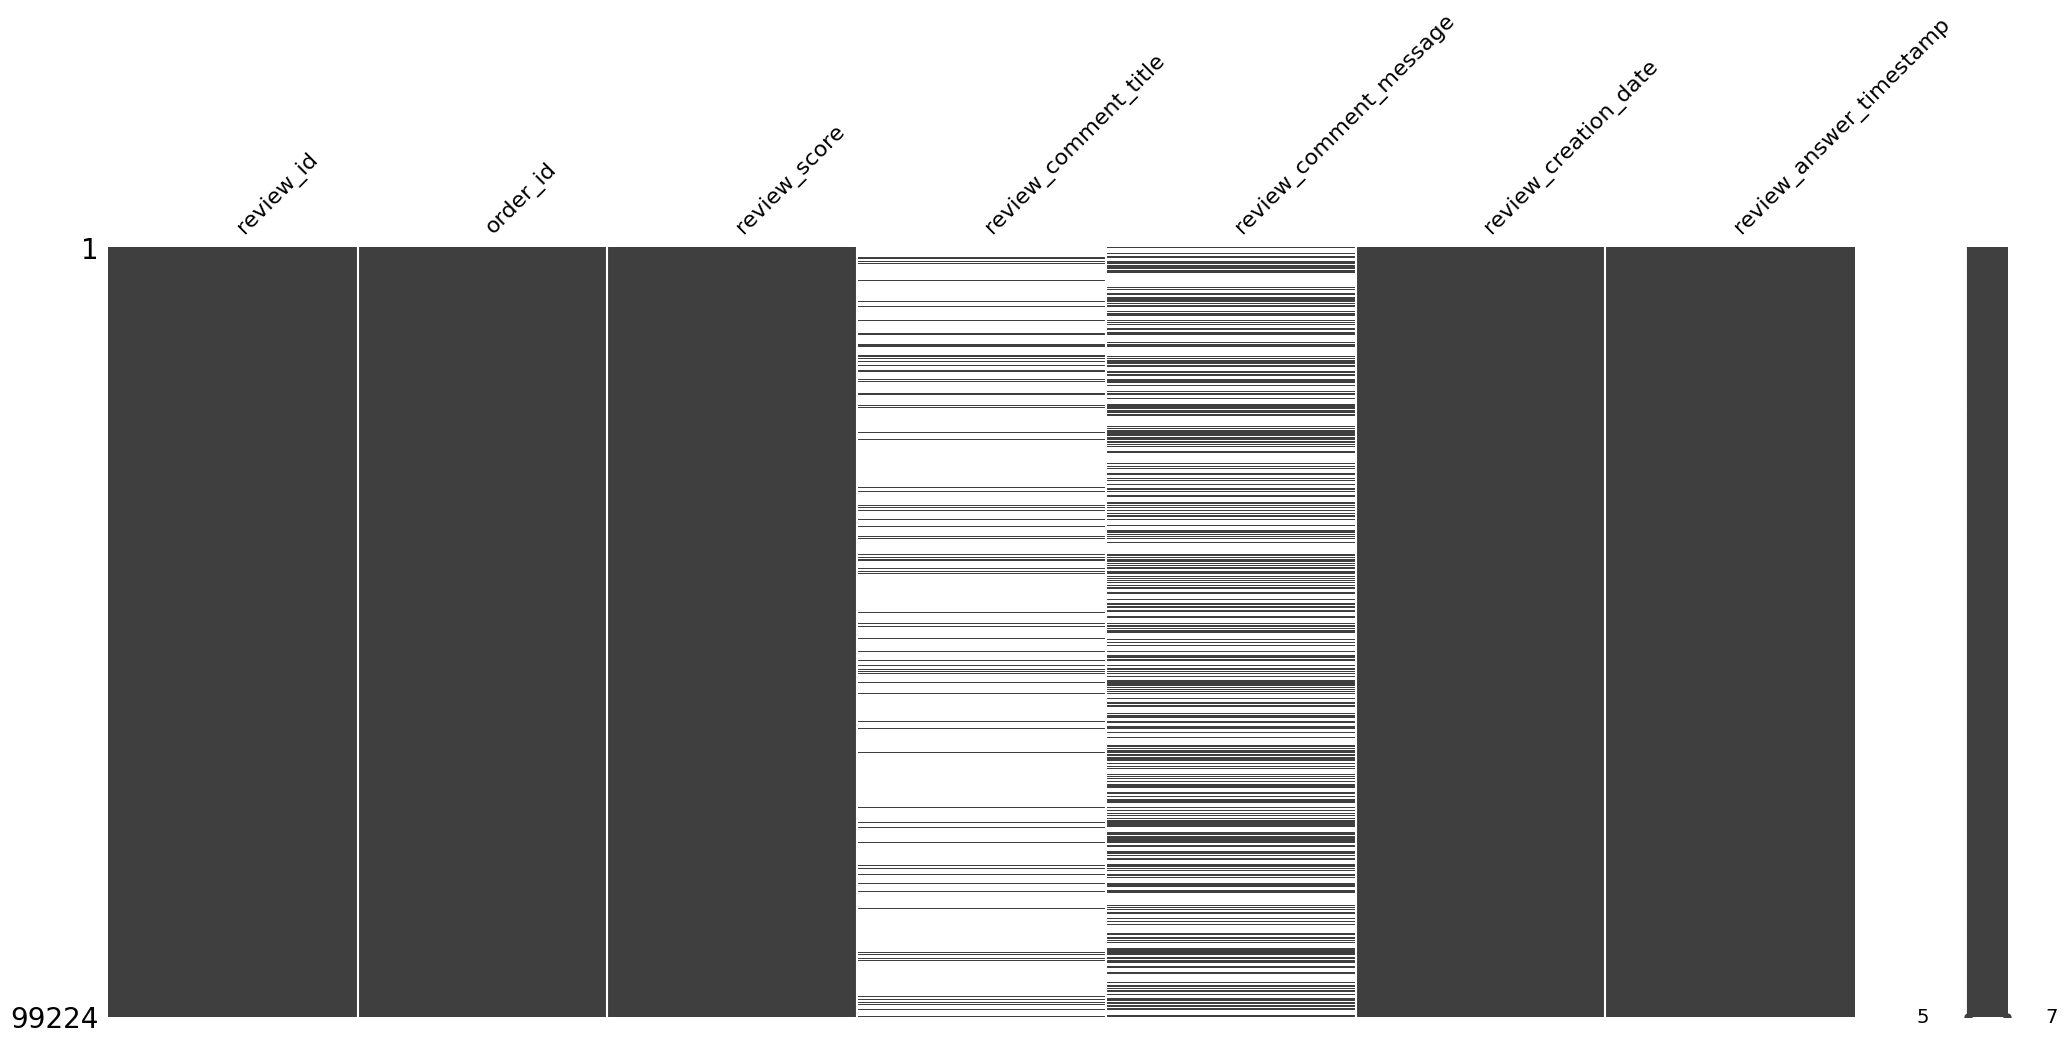

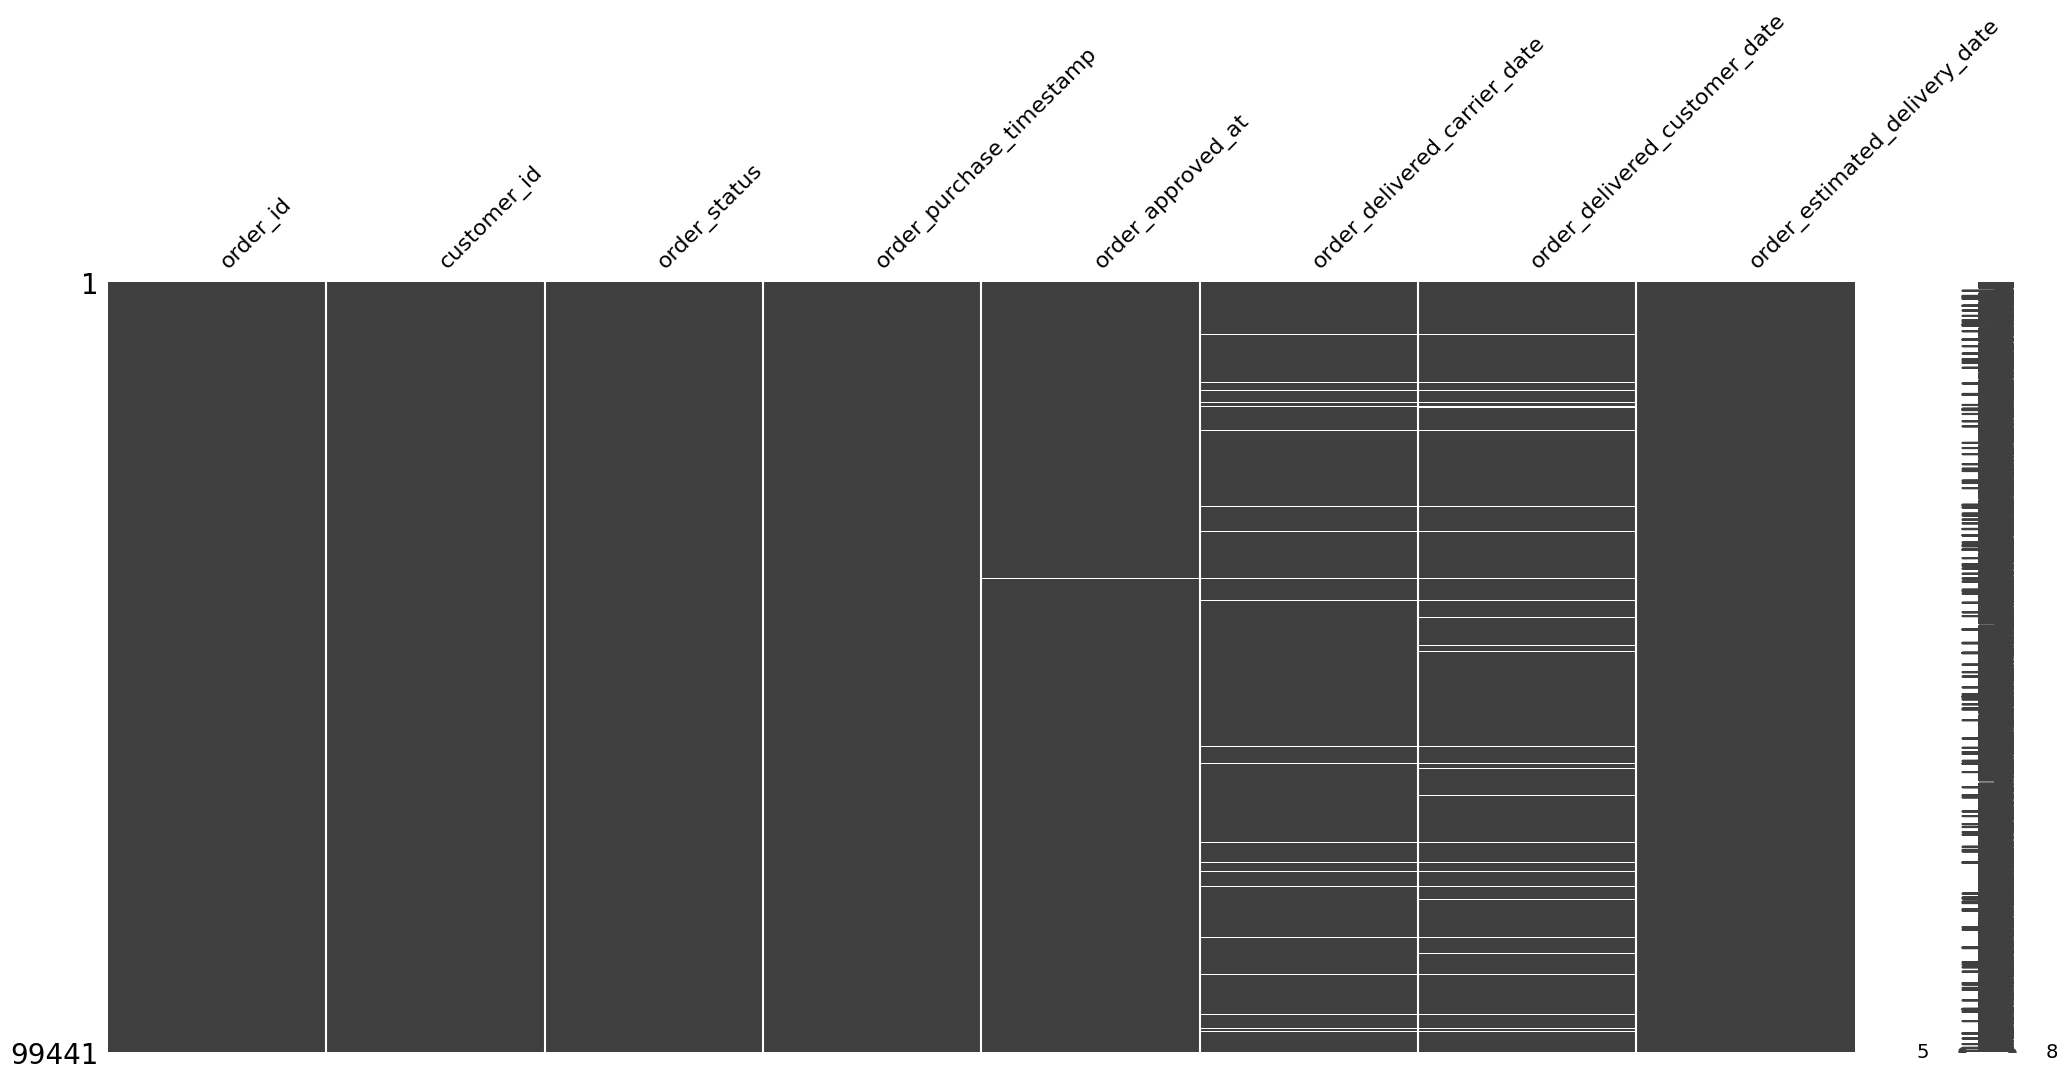

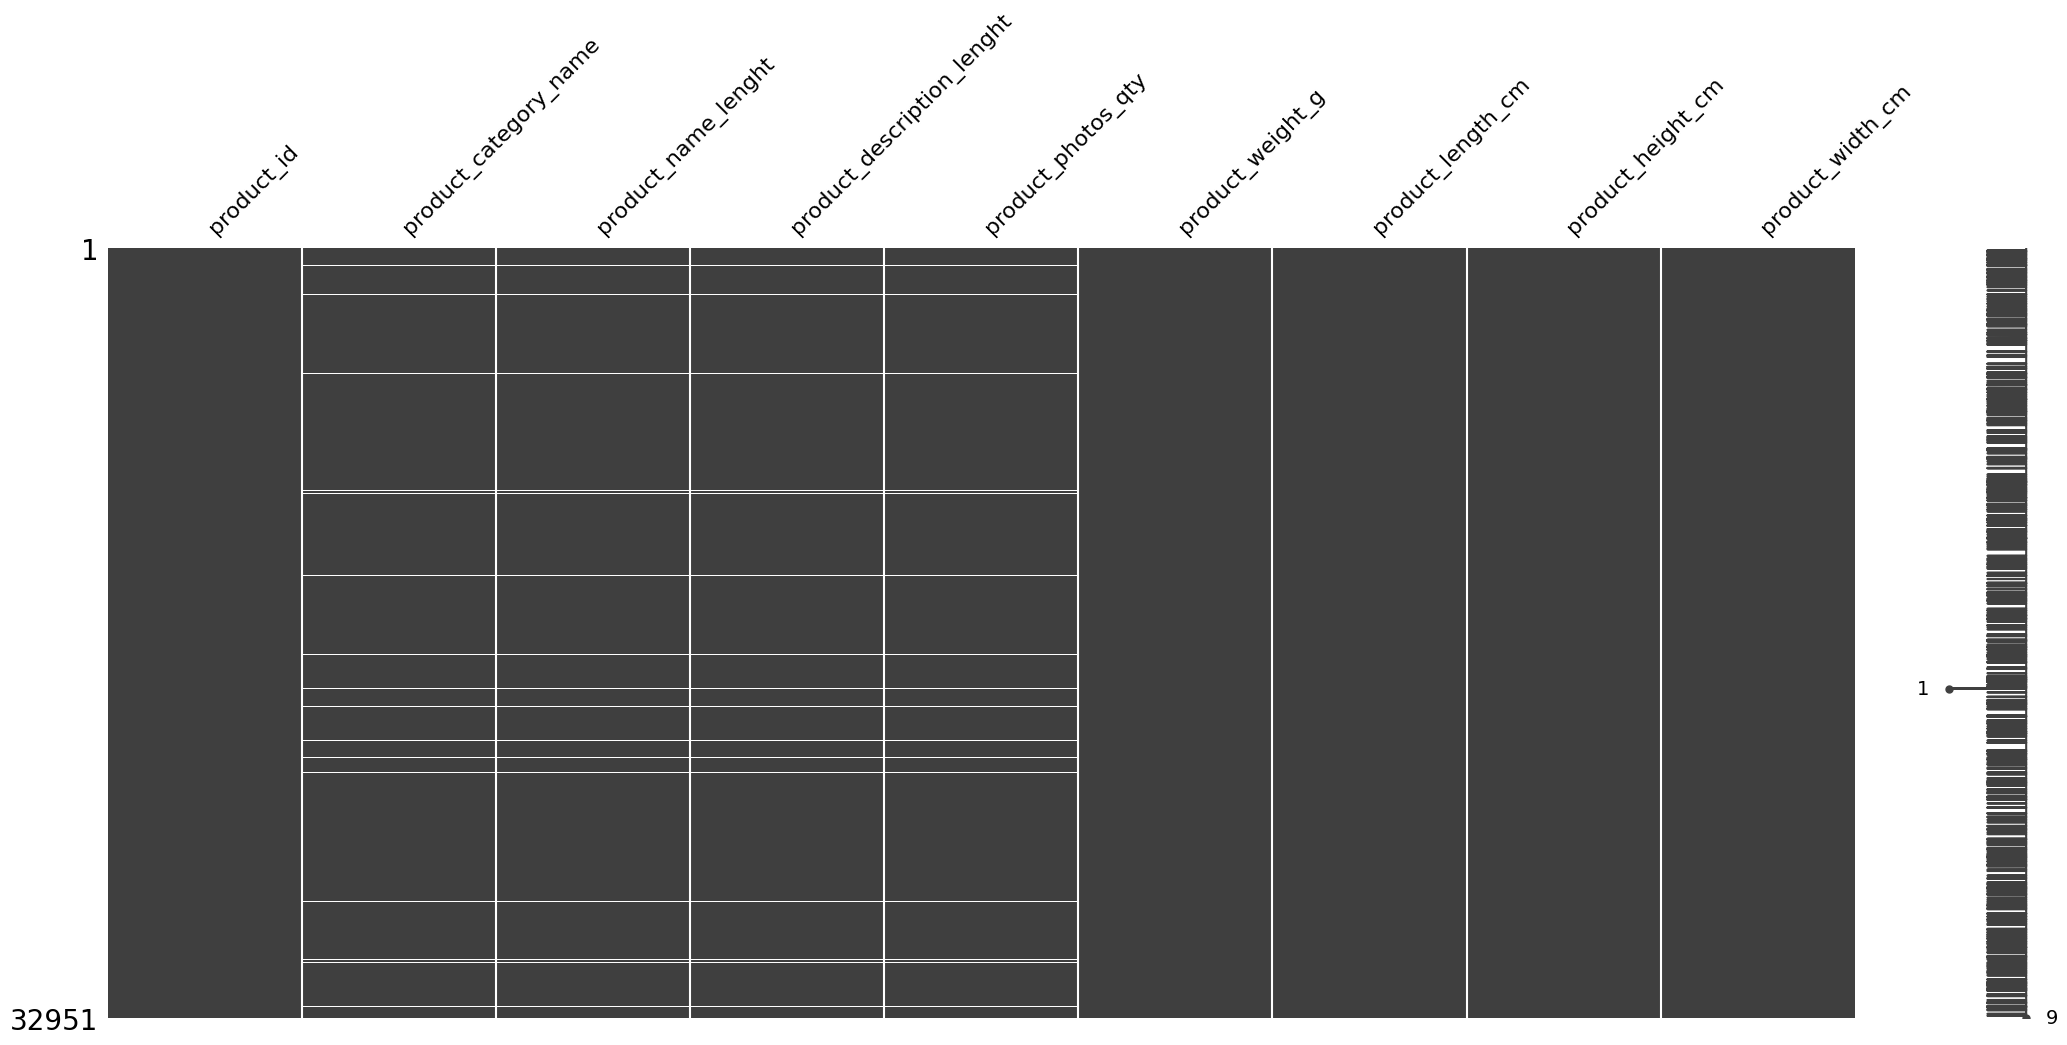

In [163]:
for x in lista_dfs_nulos:
    display(GuidaDataframe(x).esplorazione()[['Nome', 'Dados nulos', 'Dados nulos %']])
    msno.matrix(x)

#### *Agora vamos analisar os dados nulos de cada Data Frame da lista*

- **`olist_order_reviews_dataset.csv -> (dfs[4])`** ->  existem duas colunas que possuem muitos dados nulos. Portanto não é mais possível reparar essas colunas, basta removê-las.

In [164]:
dfs[4].drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)

In [165]:
dfs[4].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  category      
 1   order_id                 99224 non-null  category      
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: category(2), datetime64[ns](2), int64(1)
memory usage: 8.6 MB


- **`olist_orders_dataset.csv -> (dfs[5])`** & **`olist_products_dataset.csv -> (dfs[6])`** -> Essas colunas, no entanto, não possuem tantos dados nulos e eles estão espalhadas entre os outros registros. Portanto pode ser uma perda de tempo recuperar esses dados nulos, até porque são poucos. Portanto, não precisamos deletar a coluna inteira, apenas as nulas são suficientes.

In [166]:
dfs[5].dropna(inplace=True)
dfs[6].dropna(inplace=True)

In [167]:
GuidaDataframe(dfs[5]).esplorazione()[['Nome', 'Dados nulos', 'Dados nulos %']]

Tabela Exploratória
Nesses dados temos 96.461 linhas e 8 colunas.
Consumo de memória: 27.67Mb.


,Nome,Dados nulos,Dados nulos %
1,order_id,0,0.0
2,customer_id,0,0.0
3,order_status,0,0.0
4,order_purchase_timestamp,0,0.0
5,order_approved_at,0,0.0
6,order_delivered_carrier_date,0,0.0
7,order_delivered_customer_date,0,0.0
8,order_estimated_delivery_date,0,0.0


In [168]:
GuidaDataframe(dfs[6]).esplorazione()[['Nome', 'Dados nulos', 'Dados nulos %']]

Tabela Exploratória
Nesses dados temos 32.340 linhas e 9 colunas.
Consumo de memória: 6.95Mb.


,Nome,Dados nulos,Dados nulos %
1,product_id,0,0.0
2,product_category_name,0,0.0
3,product_name_lenght,0,0.0
4,product_description_lenght,0,0.0
5,product_photos_qty,0,0.0
6,product_weight_g,0,0.0
7,product_length_cm,0,0.0
8,product_height_cm,0,0.0
9,product_width_cm,0,0.0


### Dados nulos omitidos
Porém, sabemos que às vezes alguns dados nulos são omitidos por meio de valores como zero. Agora vamos analisar as colunas numéricas que não podem ter o número zero

## Visualização

In [169]:
dfs[5]['order_status'].value_counts()


order_status
delivered      96455
canceled           6
approved           0
created            0
invoiced           0
processing         0
shipped            0
unavailable        0
Name: count, dtype: int64

### Quantidades

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Soldado\AppData\Local\Programs\Python\Pytho

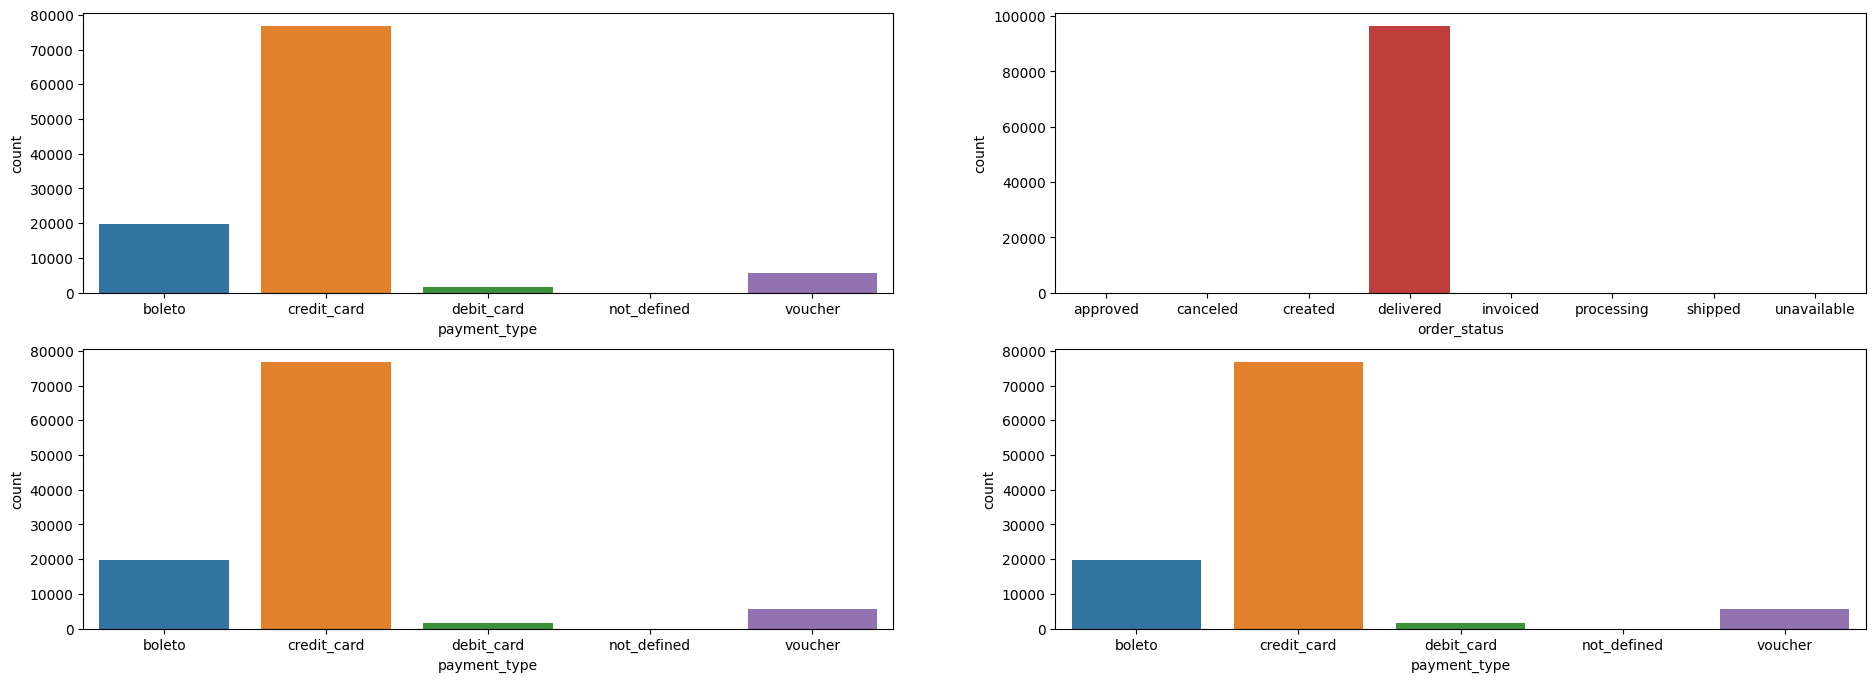

In [170]:
plt.close('all')
plt.rc('figure', figsize=(23, 8))
fig, axes = plt.subplots(2, 2)

sns.countplot(ax=axes[0, 0], x='payment_type', data=dfs[3])
sns.countplot(ax=axes[0, 1], x='order_status', data=dfs[5])
sns.countplot(ax=axes[1, 0], x='payment_type', data=dfs[3])
sns.countplot(ax=axes[1, 1], x='payment_type', data=dfs[3])

plt.show()

### Boxplot

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


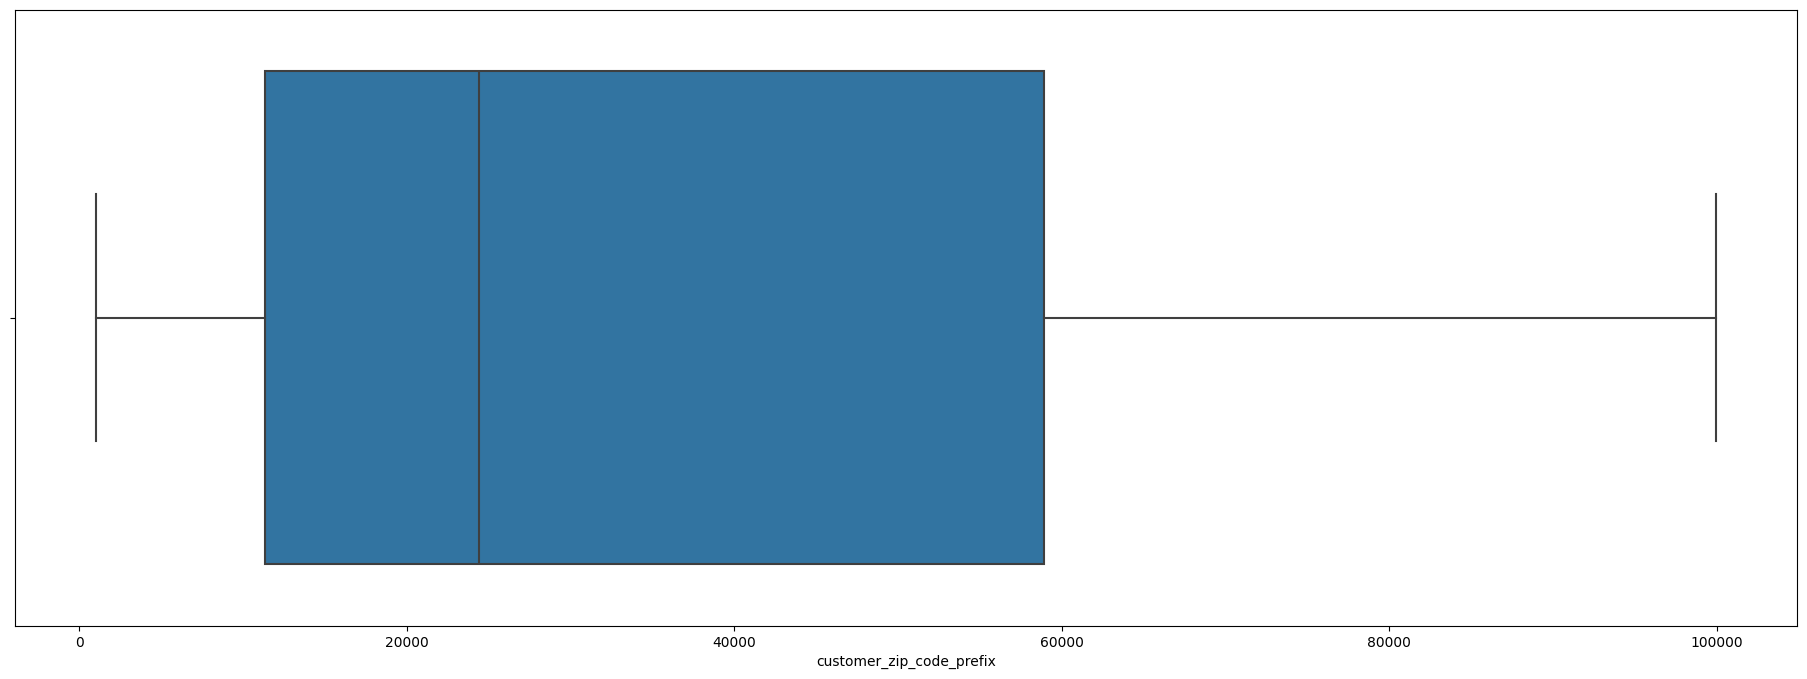

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


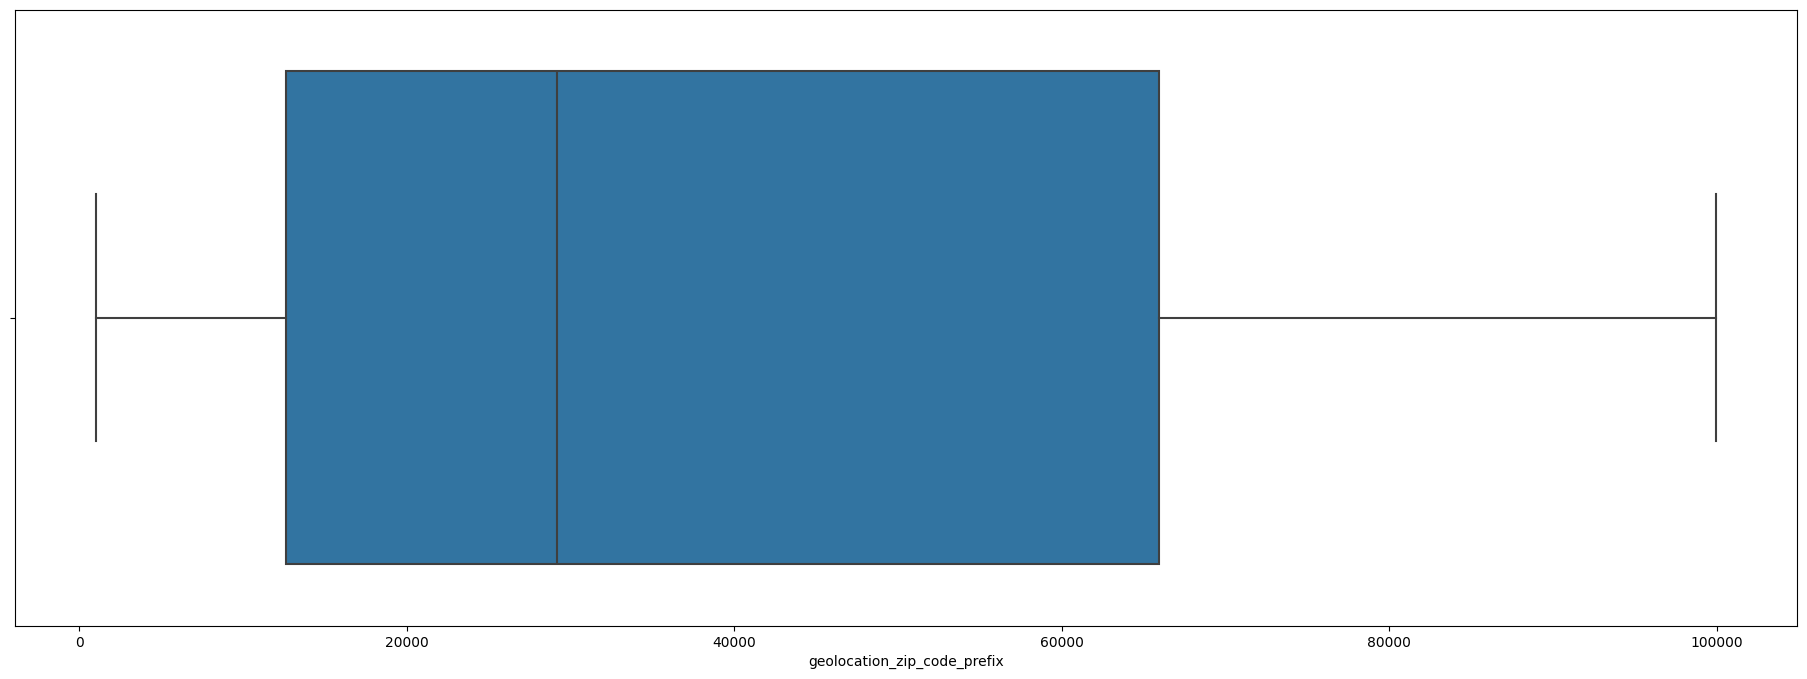

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


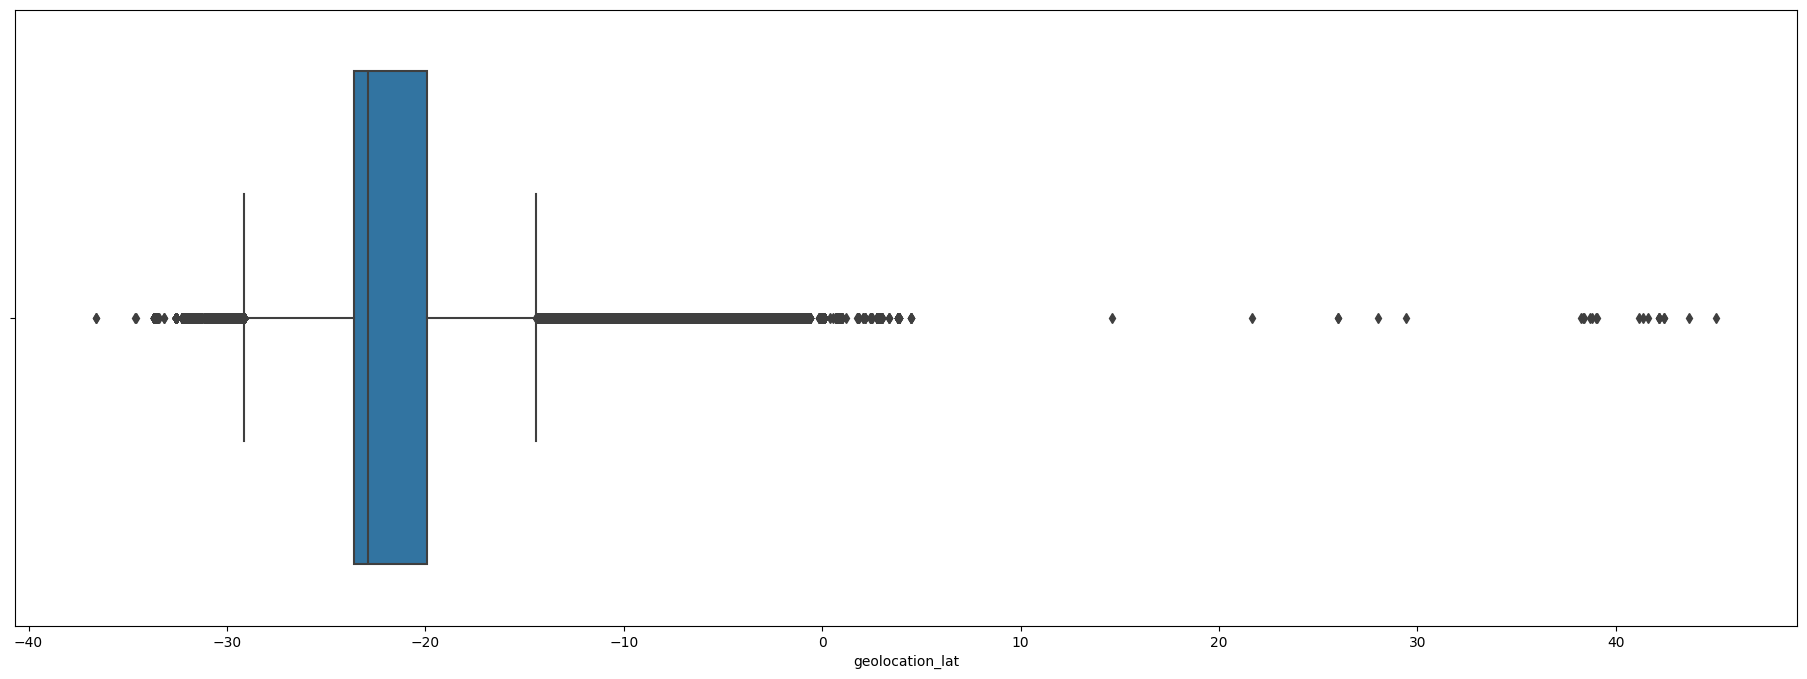

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


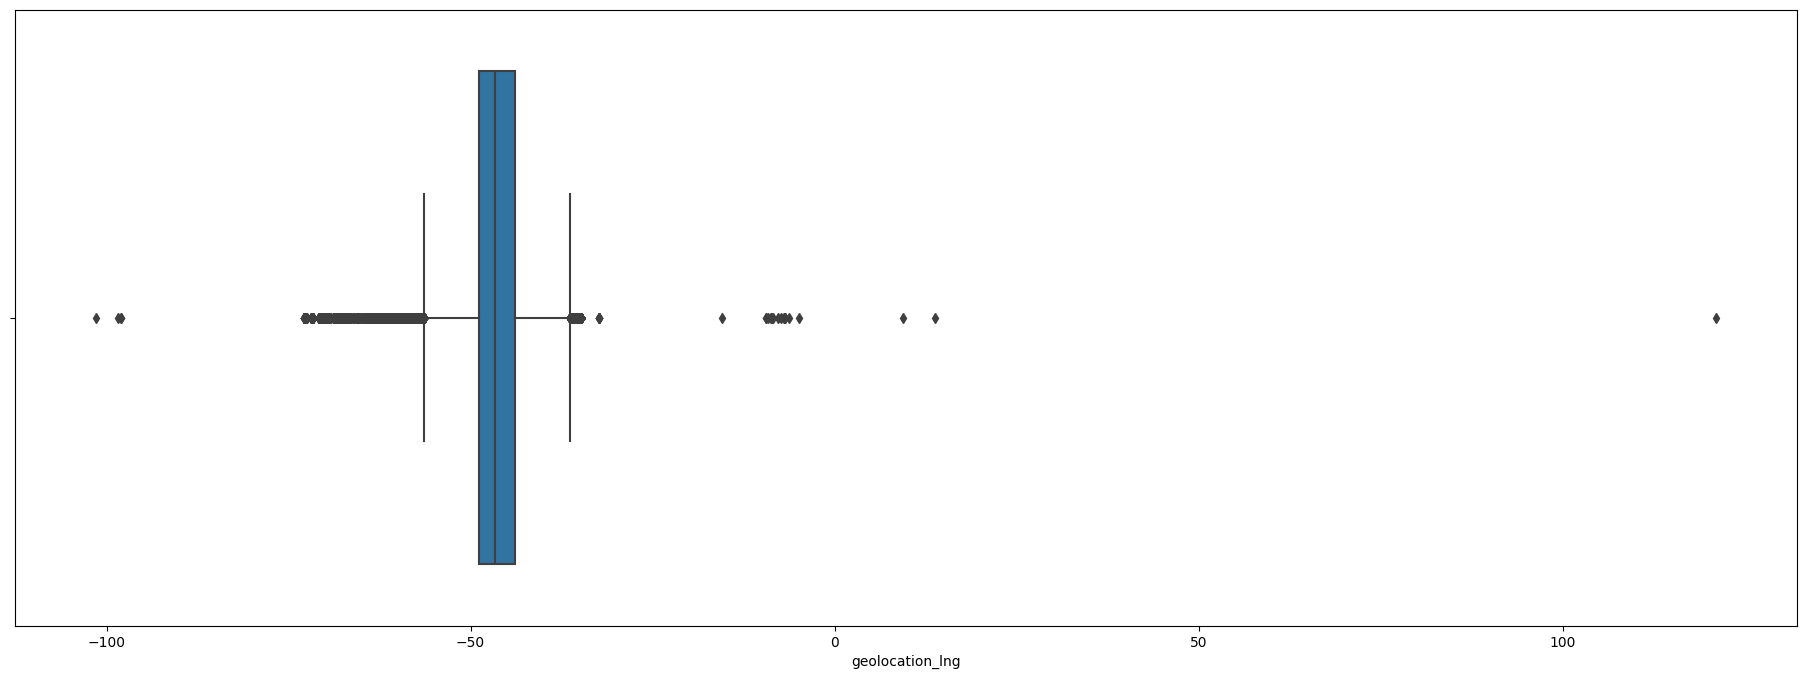

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


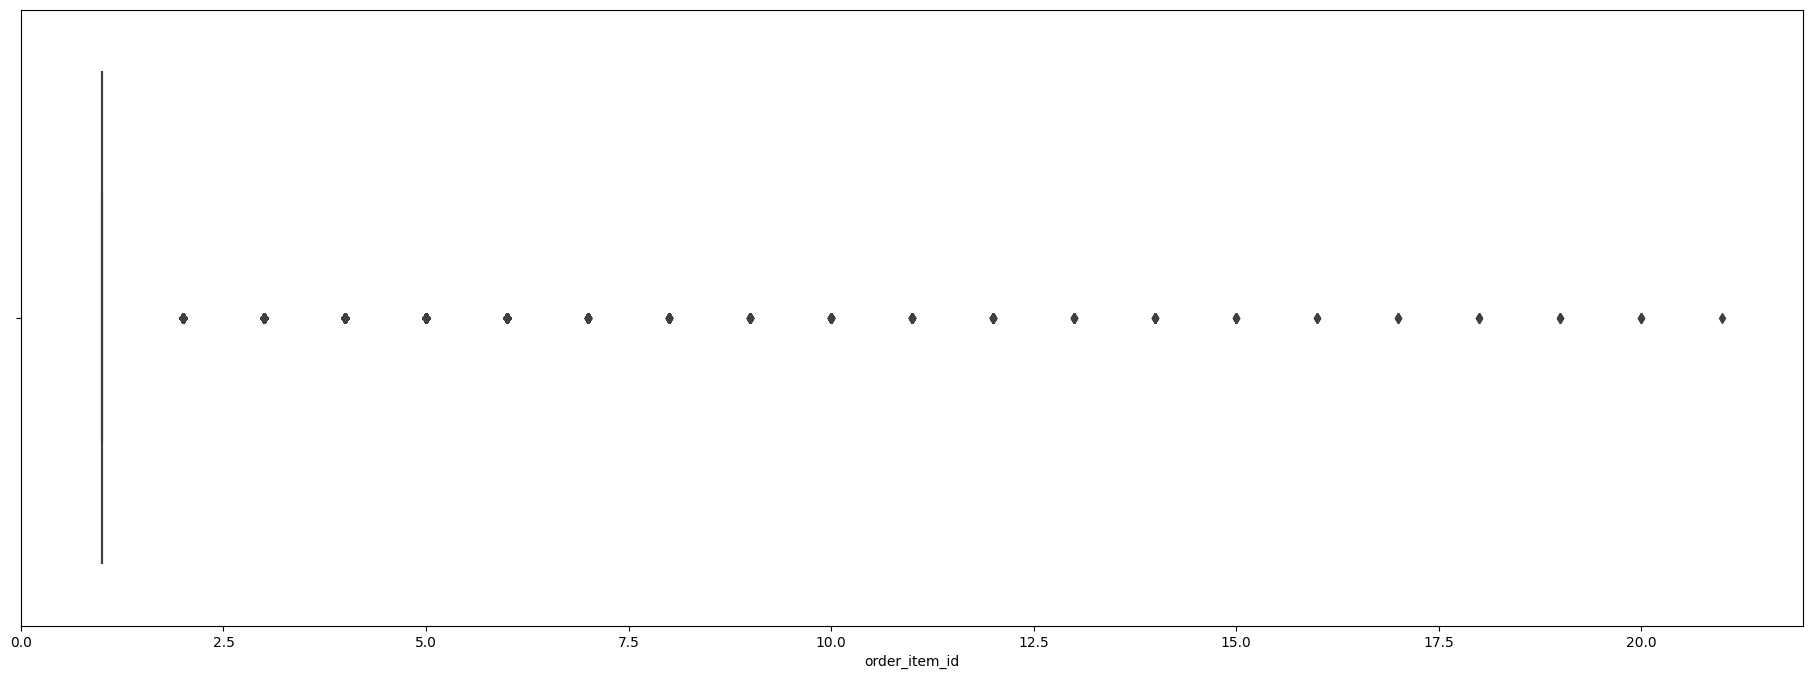

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


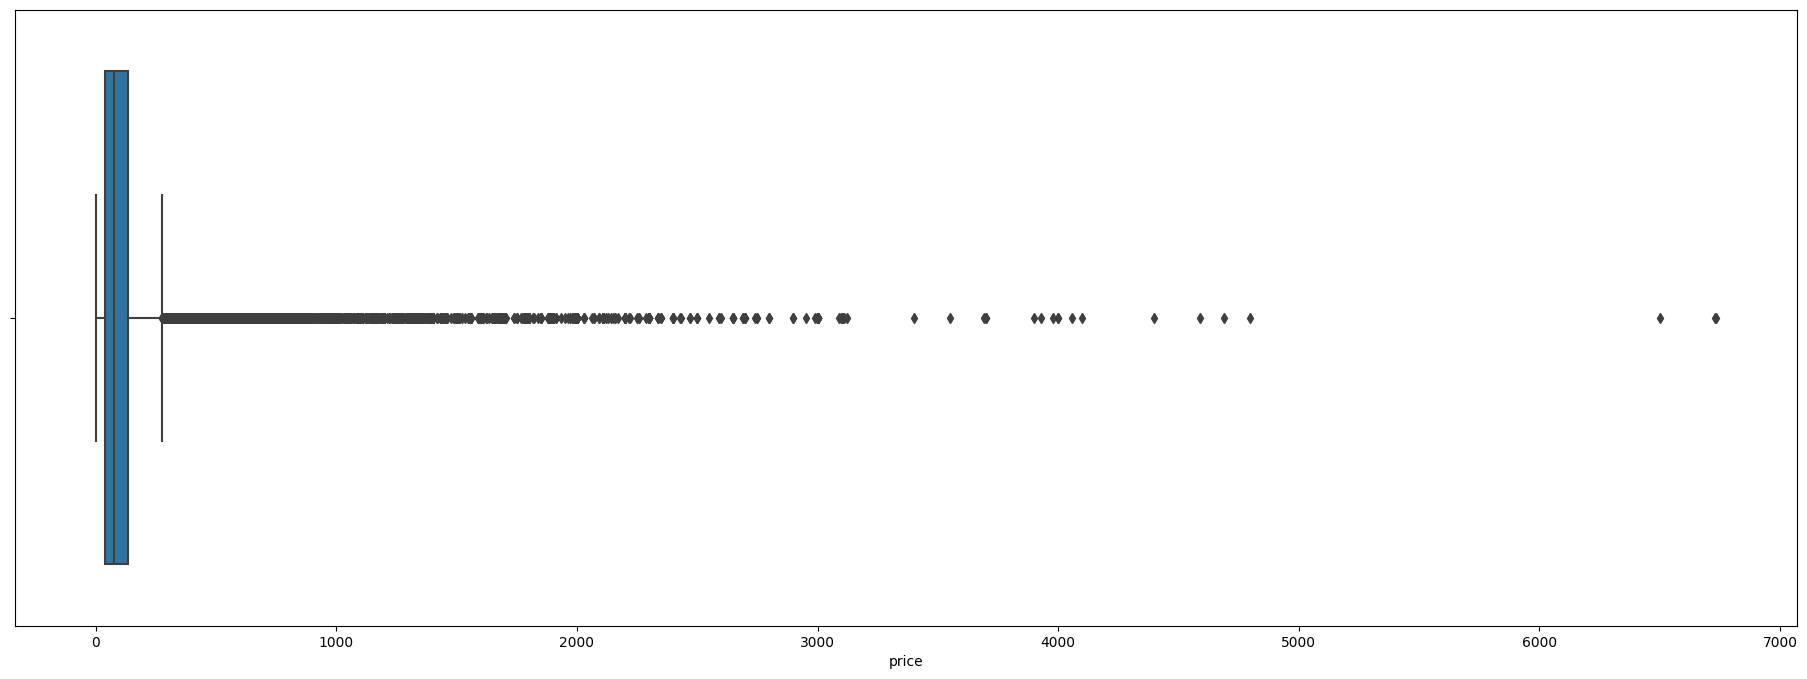

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


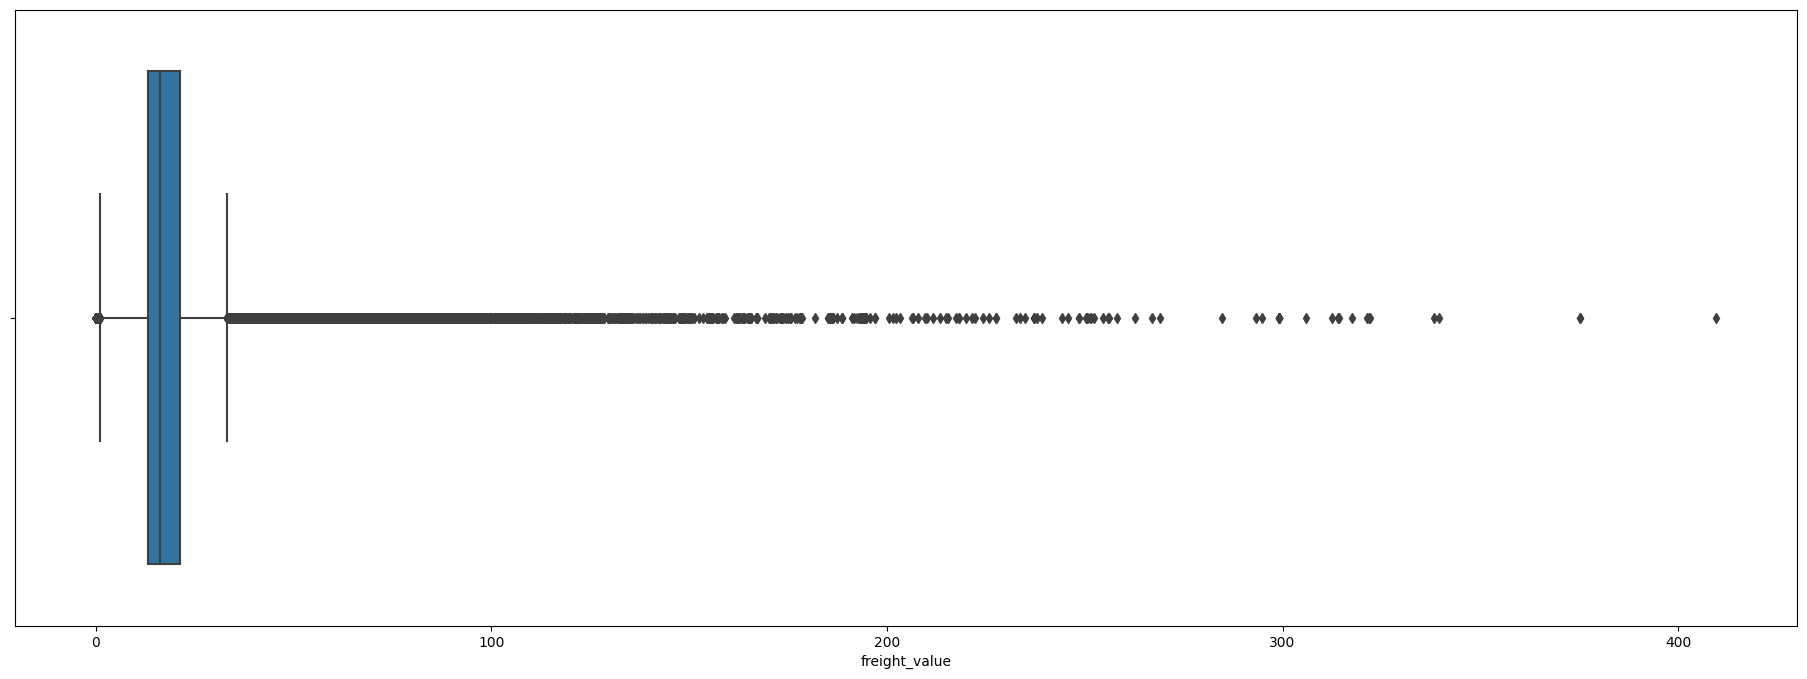

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


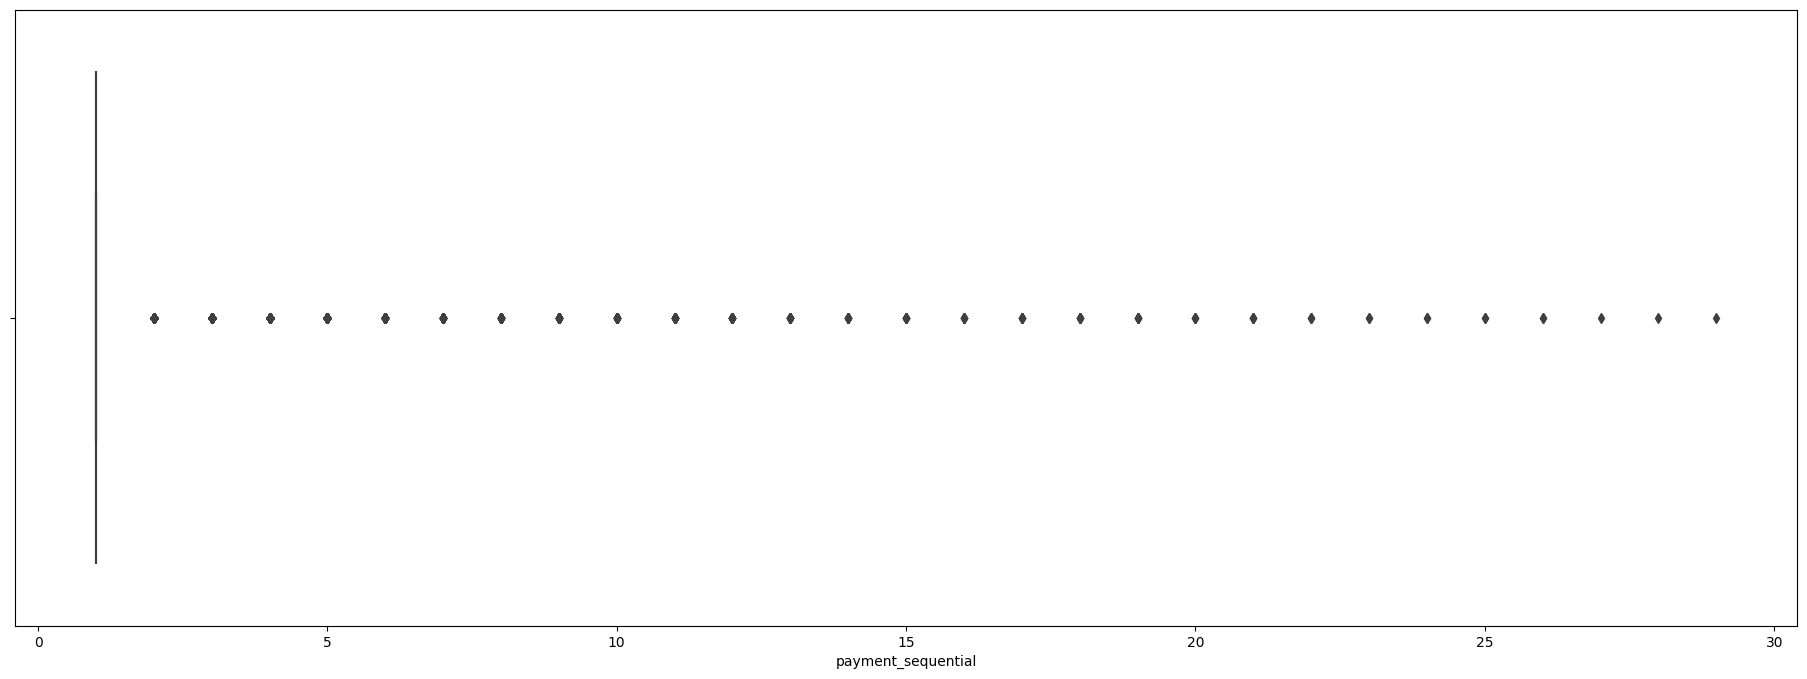

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


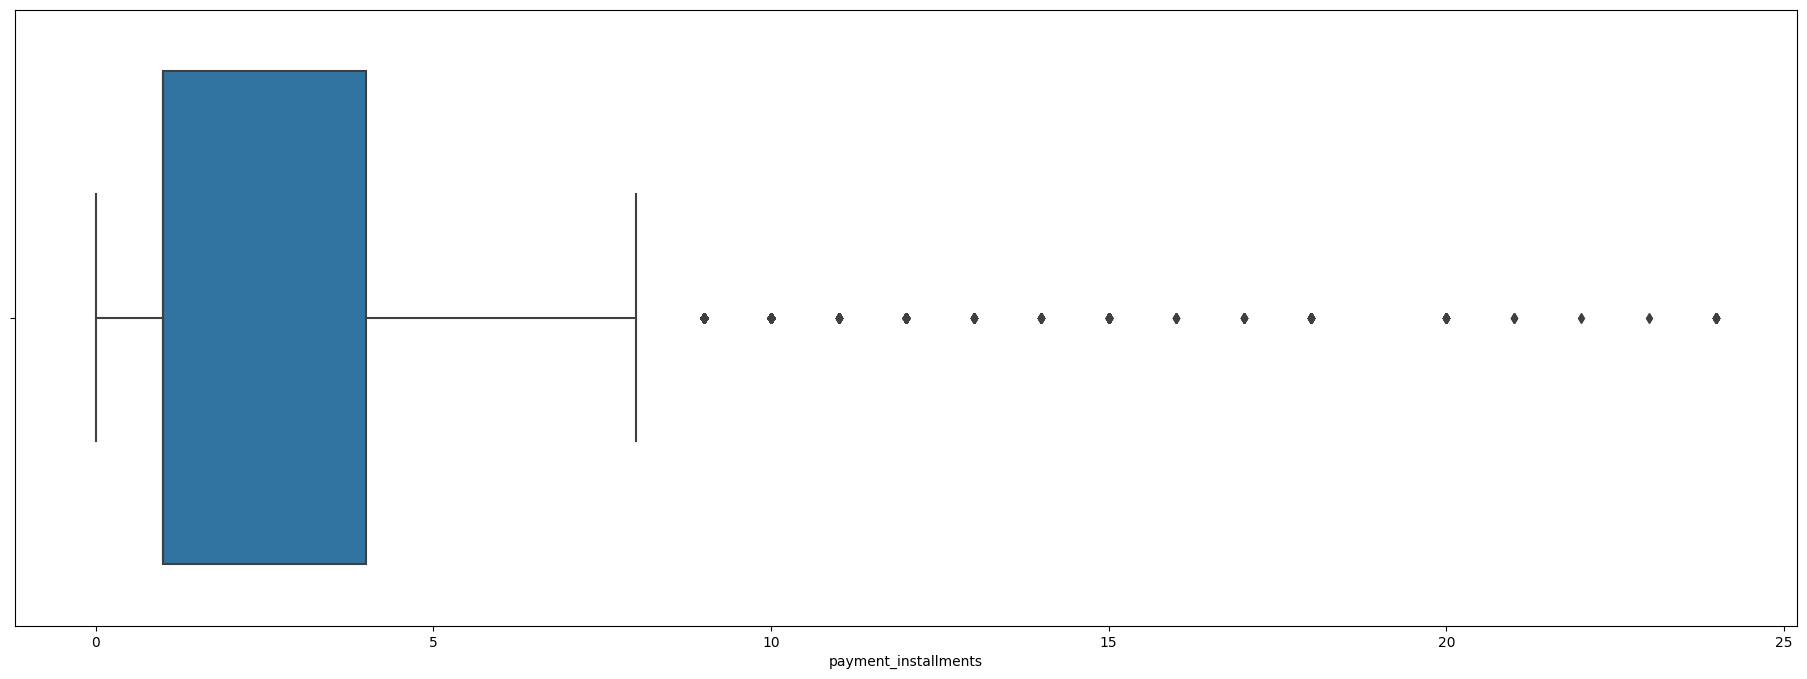

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


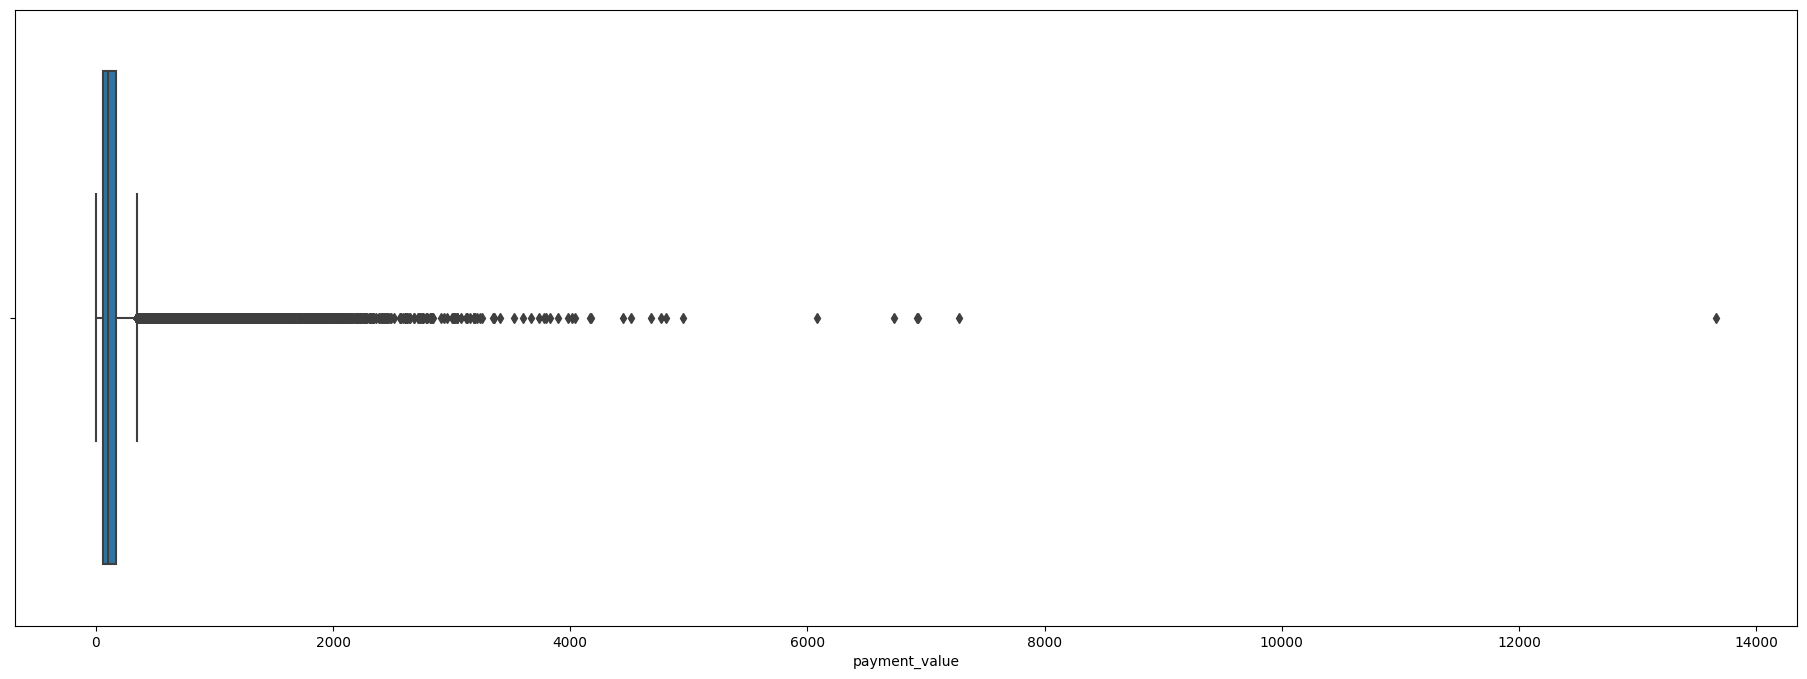

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


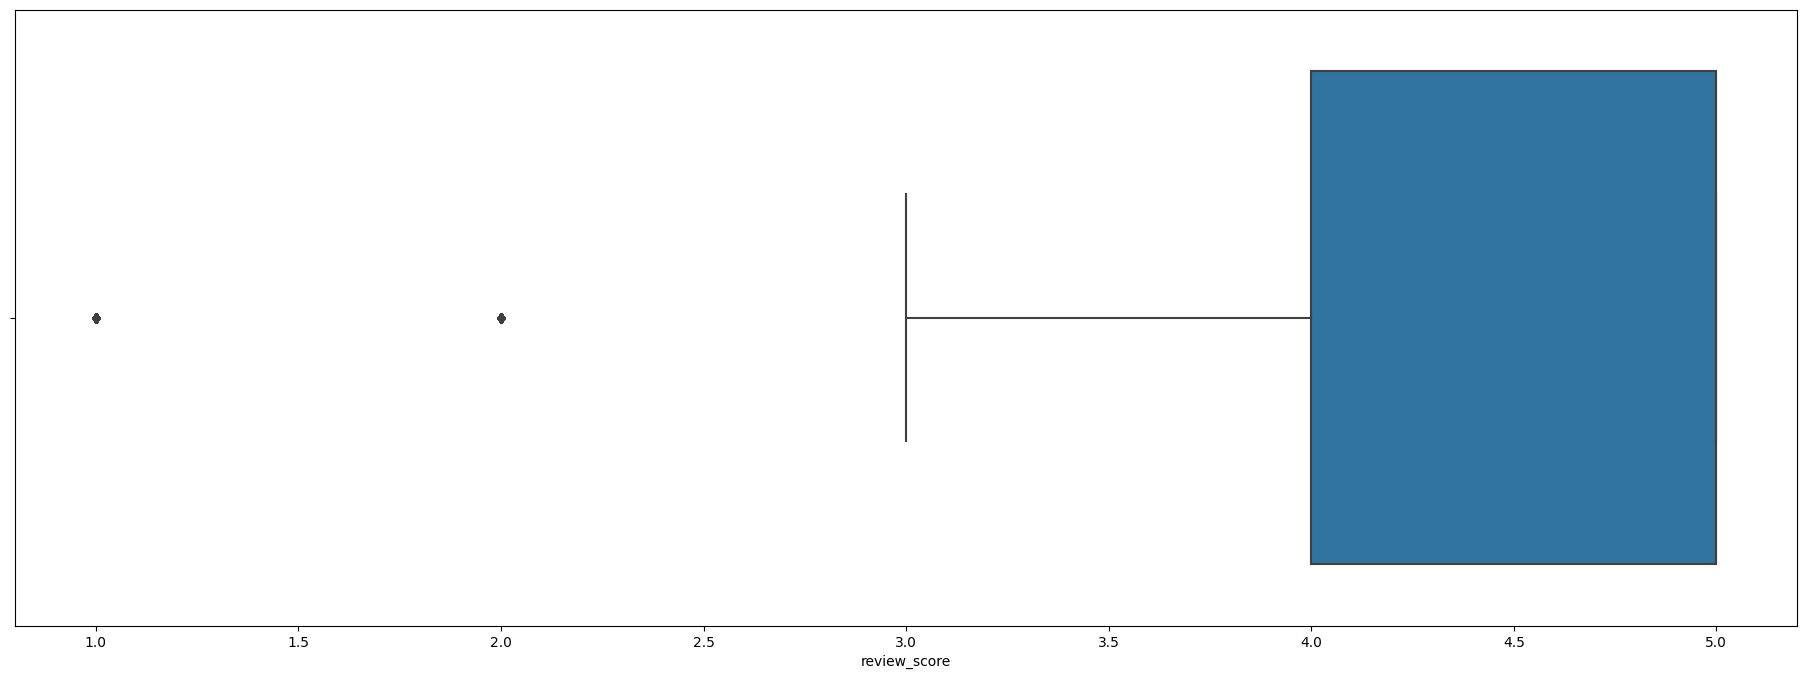

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


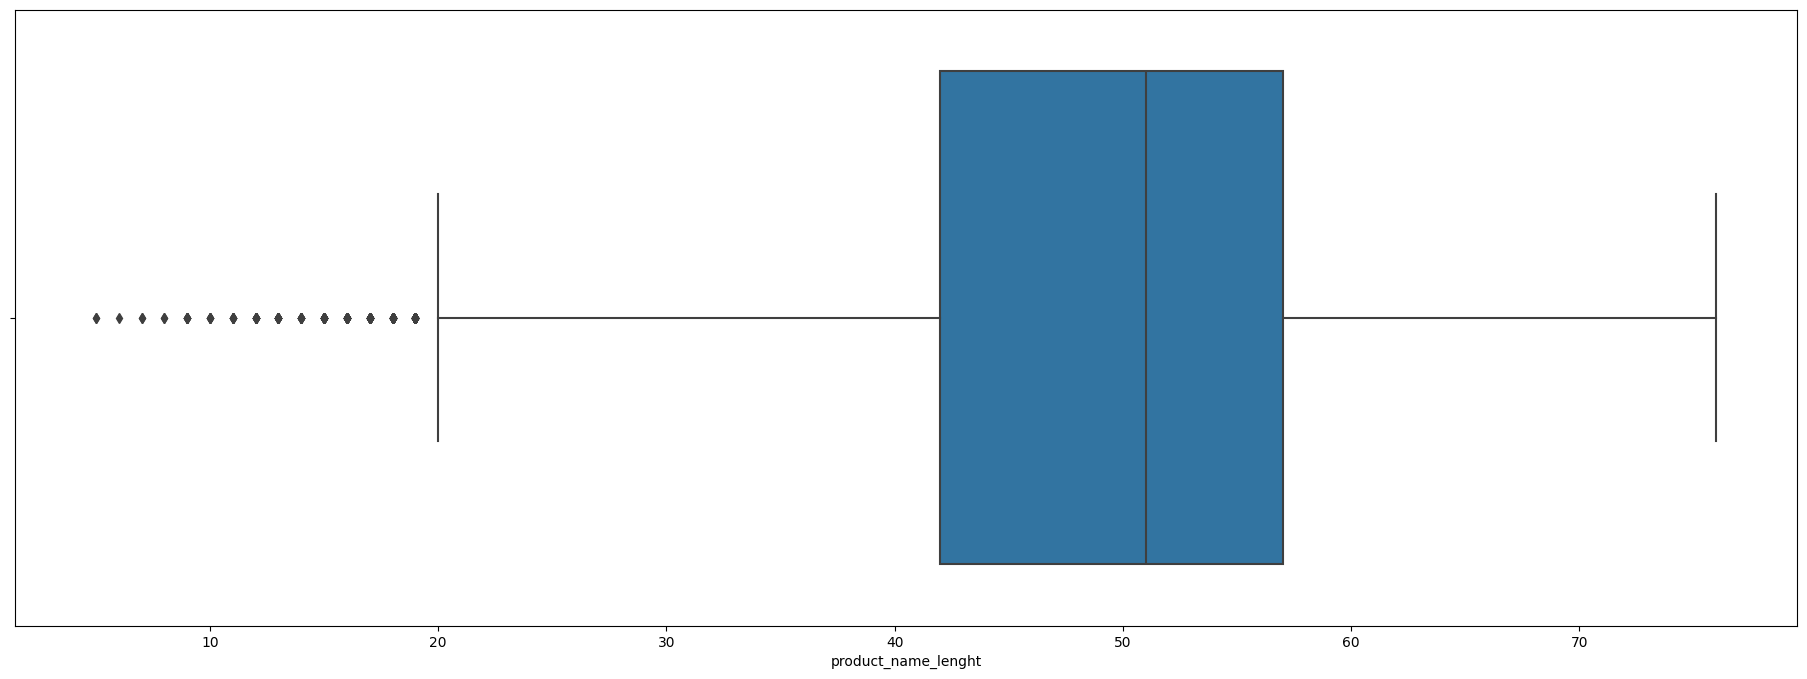

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


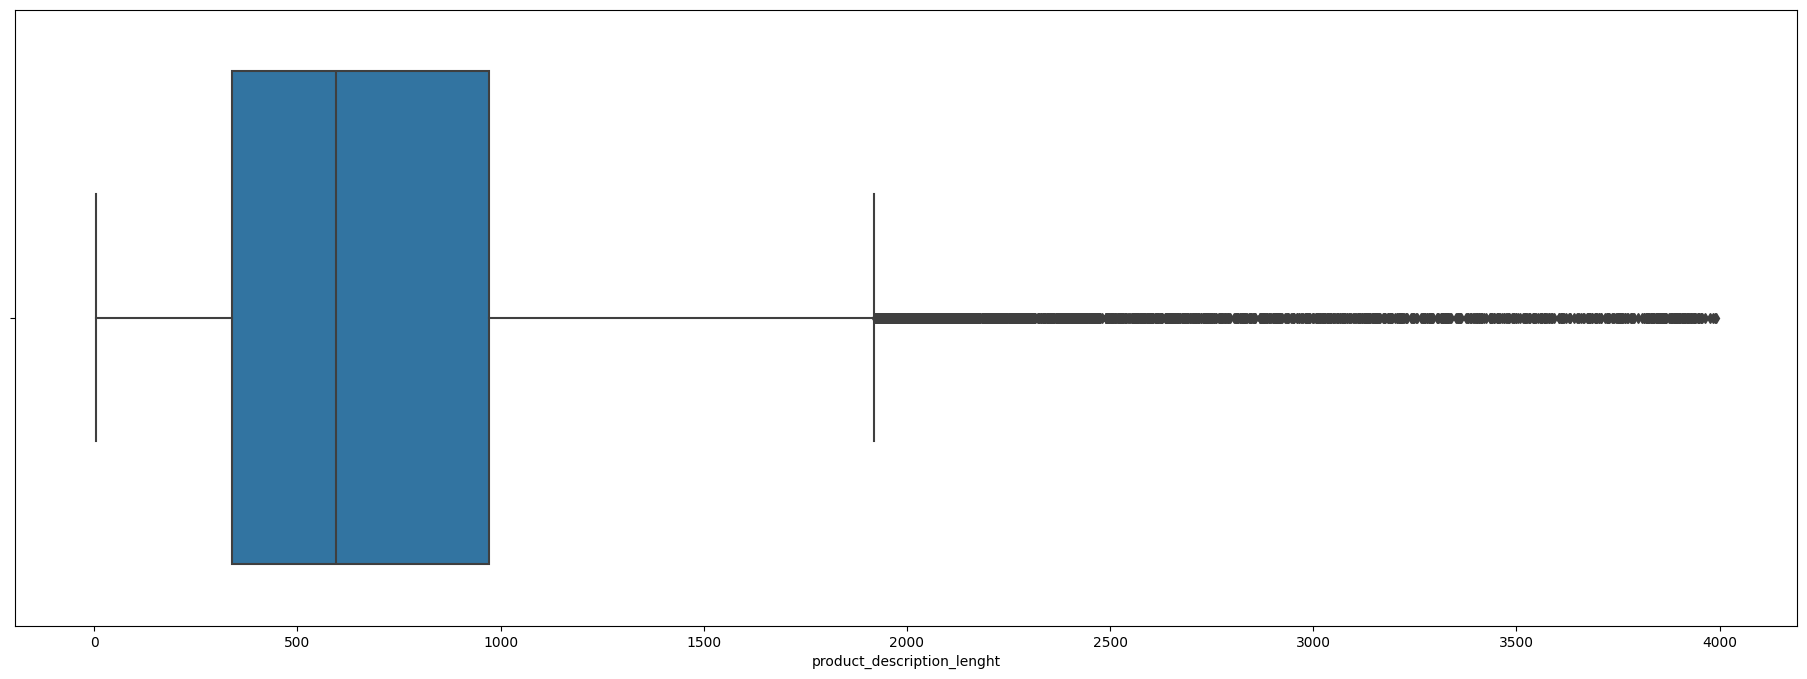

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


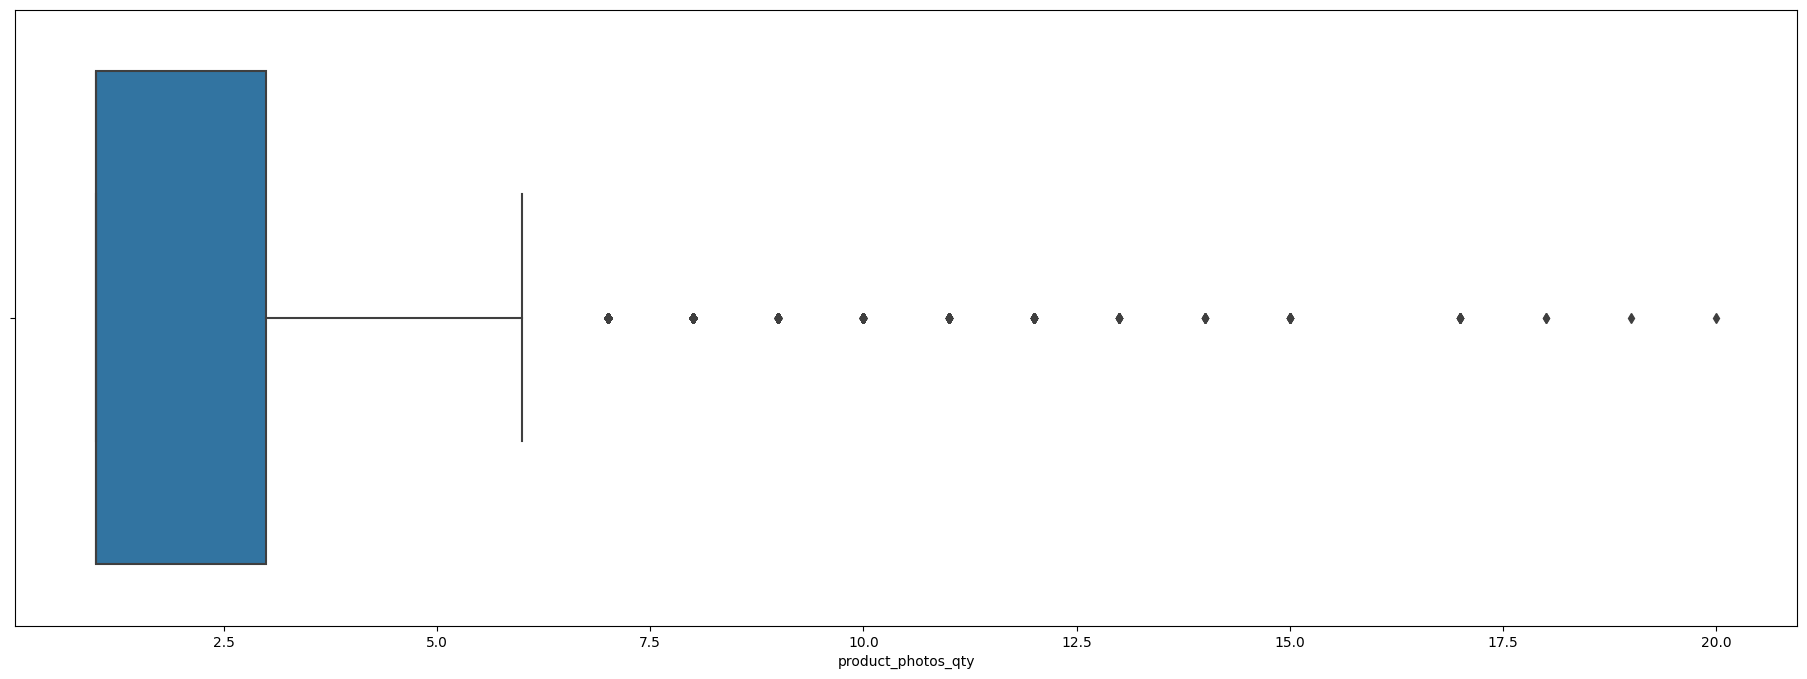

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


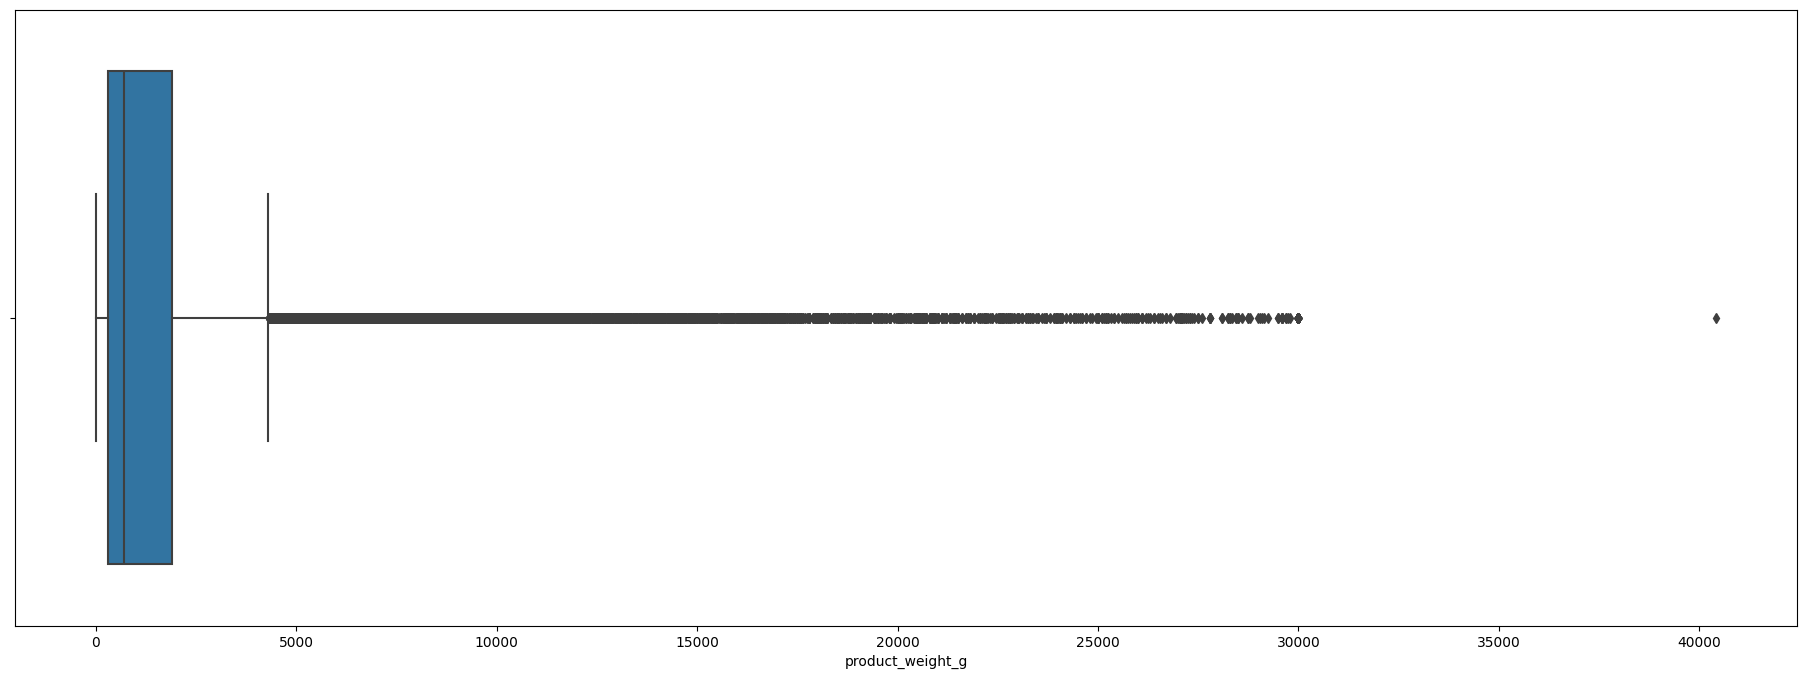

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


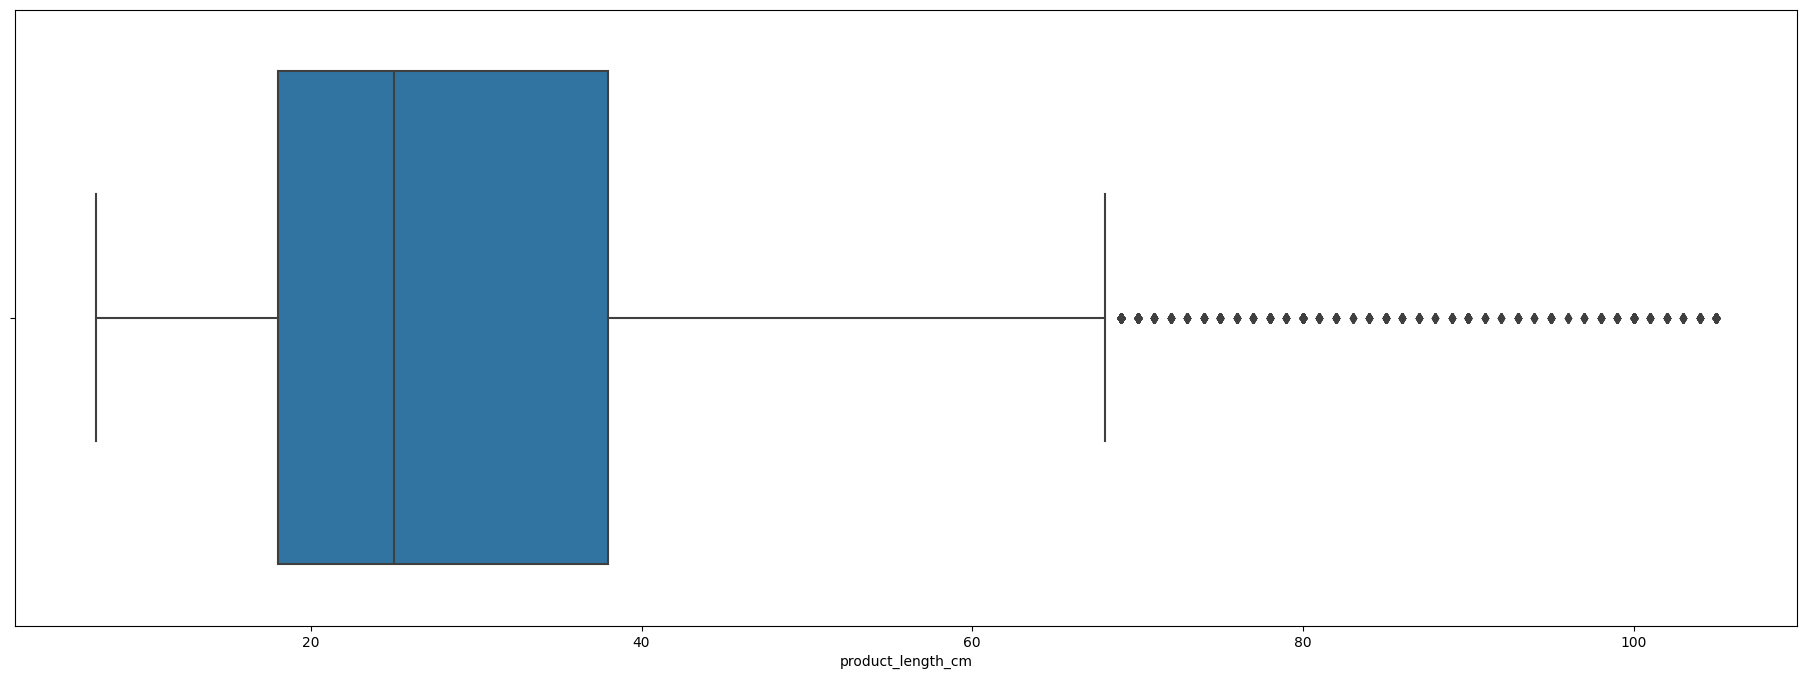

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


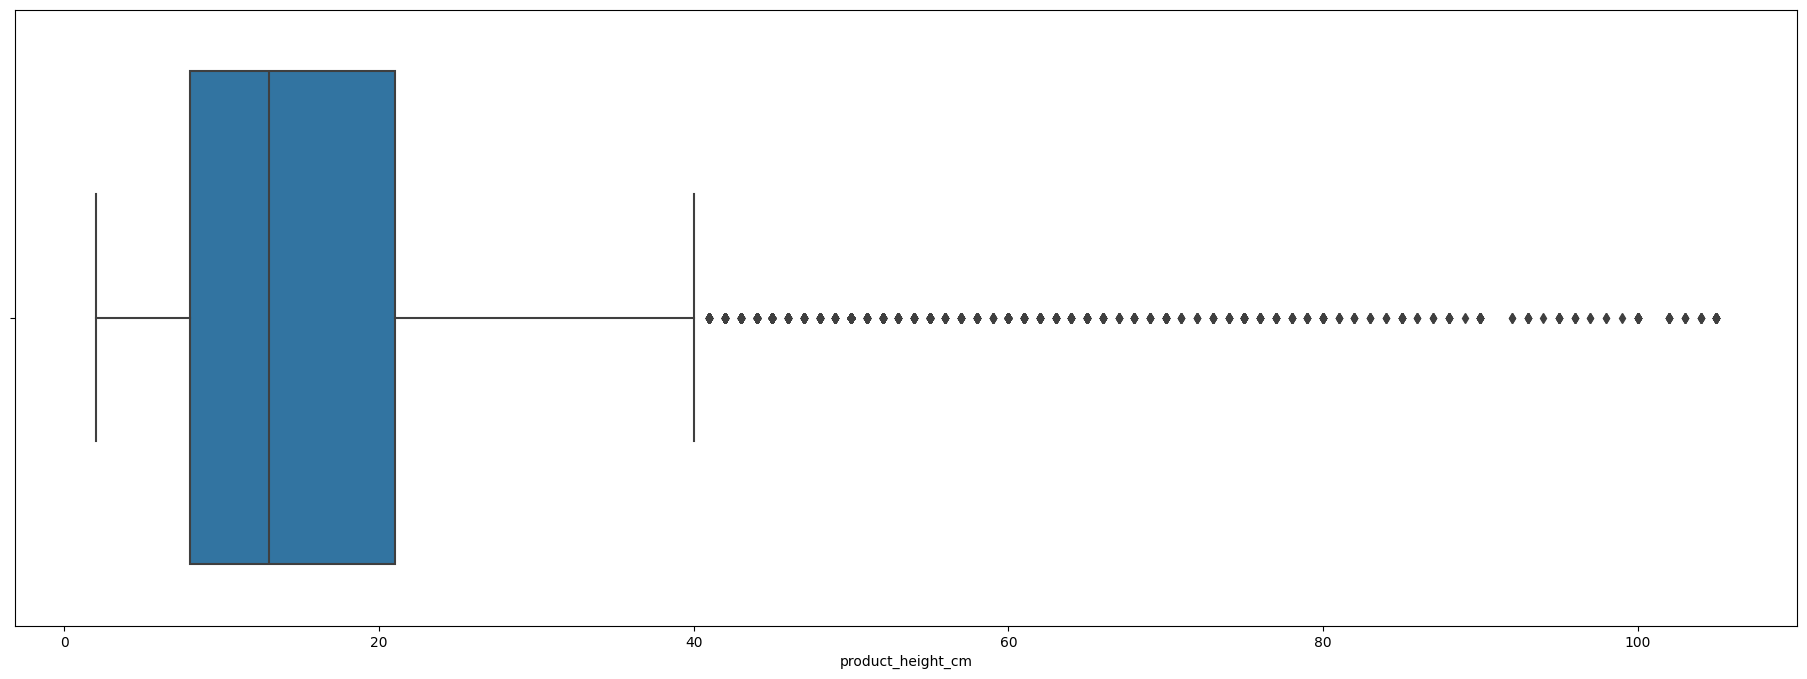

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


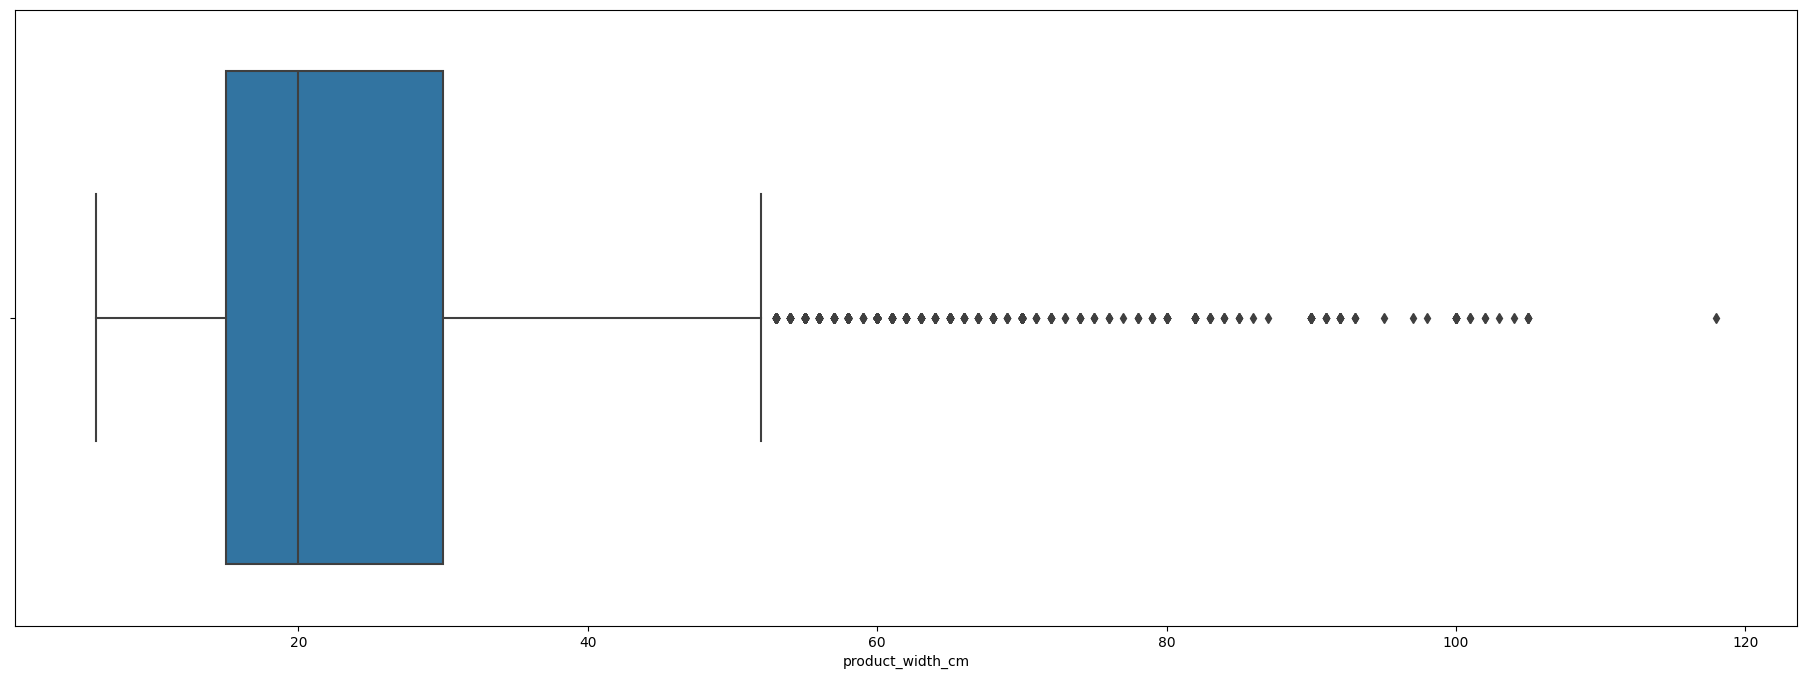

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


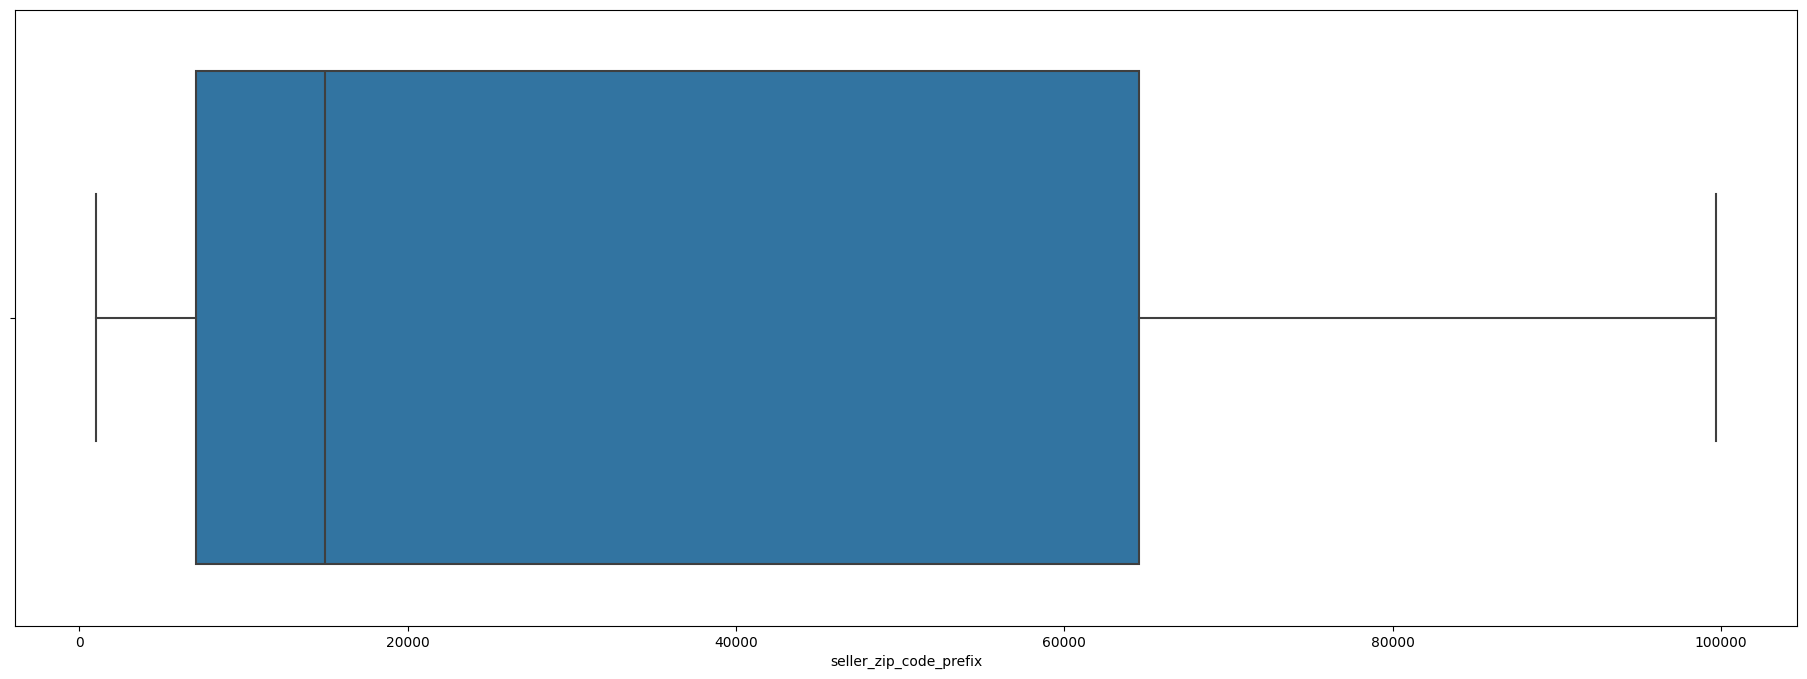

In [171]:
def value_to_boxplot(dataframe: pd.DataFrame):
    dataframe = pd.DataFrame(dataframe)
    lista_colunas_number = dataframe.select_dtypes('number').columns.to_list()
    # Rimuovere ID
     
    for coluna in lista_colunas_number:
        sns.boxplot(x=coluna, data=dataframe)
        plt.show()
        plt.close('all')

for x in dfs:
    value_to_boxplot(x)

## Métricas

### Describe

In [173]:
for df, nome in zip(dfs, lista_datasets):
    print(nome)
    display(df.describe().transpose())

olist_customers_dataset.csv


,count,mean,std,min,25%,50%,75%,max
customer_zip_code_prefix,99441.0,35137.474583,29797.938996,1003.0,11347.0,24416.0,58900.0,99990.0


olist_geolocation_dataset.csv


,count,mean,std,min,25%,50%,75%,max
geolocation_zip_code_prefix,738332.0,38316.086800,30632.496675,1001.000000,12600.000000,29144.000000,65950.000000,99990.000000
geolocation_lat,738332.0,-20.998353,5.892315,-36.605374,-23.603061,-22.873588,-19.923336,45.065933
geolocation_lng,738332.0,-46.461098,4.393705,-101.466766,-48.867822,-46.647278,-43.836974,121.105394


olist_order_items_dataset.csv


,count,mean,min,25%,50%,75%,max,std
order_item_id,112650.0,1.197834,1.0,1.0,1.0,1.0,21.0,0.705124
shipping_limit_date,112650,2018-01-07 15:36:52.192685312,2016-09-19 00:15:34,2017-09-20 20:57:27.500000,2018-01-26 13:59:35,2018-05-10 14:34:00.750000128,2020-04-09 22:35:08,NaN
price,112650.0,120.653739,0.85,39.9,74.99,134.9,6735.0,183.633928
freight_value,112650.0,19.99032,0.0,13.08,16.26,21.15,409.68,15.806405


olist_order_payments_dataset.csv


,count,mean,std,min,25%,50%,75%,max
payment_sequential,103886.0,1.092679,0.706584,1.0,1.00,1.0,1.0000,29.00
payment_installments,103886.0,2.853349,2.687051,0.0,1.00,1.0,4.0000,24.00
payment_value,103886.0,154.100380,217.494064,0.0,56.79,100.0,171.8375,13664.08


olist_order_reviews_dataset.csv


,count,mean,min,25%,50%,75%,max,std
review_score,99224.0,4.086421,1.0,4.0,5.0,5.0,5.0,1.347579
review_creation_date,99224,2018-01-12 20:49:23.948238336,2016-10-02 00:00:00,2017-09-23 00:00:00,2018-02-02 00:00:00,2018-05-16 00:00:00,2018-08-31 00:00:00,NaN
review_answer_timestamp,99224,2018-01-16 00:23:56.977938688,2016-10-07 18:32:28,2017-09-27 01:53:27.249999872,2018-02-04 22:41:47.500000,2018-05-20 12:11:21.500000,2018-10-29 12:27:35,NaN


olist_orders_dataset.csv


,count,mean,min,25%,50%,75%,max
order_purchase_timestamp,96461,2018-01-01 23:53:26.642249216,2016-09-15 12:16:38,2017-09-14 09:28:28,2018-01-20 19:59:42,2018-05-05 18:33:24,2018-08-29 15:00:37
order_approved_at,96461,2018-01-02 10:10:06.480142336,2016-09-15 12:16:38,2017-09-14 14:30:14,2018-01-22 13:49:00,2018-05-06 10:30:49,2018-08-29 15:10:26
order_delivered_carrier_date,96461,2018-01-05 05:21:04.508827392,2016-10-08 10:34:01,2017-09-18 16:52:19,2018-01-24 16:19:03,2018-05-08 14:33:00,2018-09-11 19:48:28
order_delivered_customer_date,96461,2018-01-14 13:17:13.228102400,2016-10-11 13:46:32,2017-09-25 22:31:59,2018-02-02 19:50:56,2018-05-15 23:08:54,2018-10-17 13:22:46


olist_products_dataset.csv


,count,mean,std,min,25%,50%,75%,max
product_name_lenght,32340.0,48.476592,10.245699,5.0,42.0,51.0,57.0,76.0
product_description_lenght,32340.0,771.492393,635.124831,4.0,339.0,595.0,972.0,3992.0
product_photos_qty,32340.0,2.188961,1.736787,1.0,1.0,1.0,3.0,20.0
product_weight_g,32340.0,2276.956586,4279.291845,0.0,300.0,700.0,1900.0,40425.0
product_length_cm,32340.0,30.854545,16.955965,7.0,18.0,25.0,38.0,105.0
product_height_cm,32340.0,16.958813,13.636115,2.0,8.0,13.0,21.0,105.0
product_width_cm,32340.0,23.208596,12.078762,6.0,15.0,20.0,30.0,118.0


olist_sellers_dataset.csv


,count,mean,std,min,25%,50%,75%,max
seller_zip_code_prefix,3095.0,32291.059451,32713.45383,1001.0,7093.5,14940.0,64552.5,99730.0


product_category_name_translation.csv


,count,unique,top,freq
product_category_name,71,71,agro_industria_e_comercio,1
product_category_name_english,71,71,agro_industry_and_commerce,1


## Conclusão e hipótese

**Atingimos o nosso objetivo!**

Agora compreendemos melhor os dados que temos à nossa disposição para podermos realizar análises mais precisas, levando em consideração todas as nuances relativas aos dados, para obter os melhore Insights.

*Conclusão da analise exploratória:*

### **`Perguntas`**

<ol type="1">
  <li>Carregamento dos dados e dos pacotes</li>
</ol>

Se quiser acessar as respostas dessas perguntas vá para o próximo projeto: [Análise completa]()

##

<p align="center">
  Enzo Schitini
</p>

<p align="center">
  Data Scientist • Expert Bubble.io • UX & UI @ Nugus creator
</p>